<a href="https://colab.research.google.com/github/pushpitab18/PW_MACHINE_LEARNING_ASSIGNMENTS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - 1:
#"Title: Bike Details Dataset"

##Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


##Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

##"Title: Bike Details Dataset"

- =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
- selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
- seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).


In [ ]:
#all lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.read_csv('BIKE DETAILS.csv')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


##Questions & answers :


##Q1 :  What is the range of selling prices in the dataset?

In [ ]:
#ans :

df = pd.read_csv('BIKE DETAILS.csv')

# Calculating the range of selling prices
price_range = df['selling_price'].max() - df['selling_price'].min()

print(price_range)



755000


##Q2 : What is the median selling price for bikes in the dataset?

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')
#calculating the meadian
median_selling_price = df['selling_price'].median()
print(median_selling_price)

45000.0


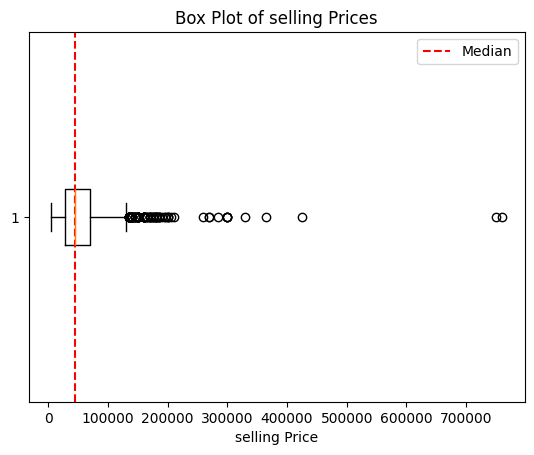

In [ ]:
#step 2 :
plt.boxplot(df['selling_price'], vert=False)
plt.title('Box Plot of selling Prices')
plt.xlabel('selling Price')

# Adding a horizontal line to represent the median
plt.axvline(median_selling_price, color='red', linestyle='--', label='Median')

# Adding a legend
plt.legend()

plt.show()

##Q3 : What is the most common seller type?


In [ ]:
#ans :
#step 1 :

seller_type_freq = df['seller_type'].value_counts()

# Got the most common seller type
most_common_seller_type = seller_type_freq.index[0]

print(most_common_seller_type)


Individual


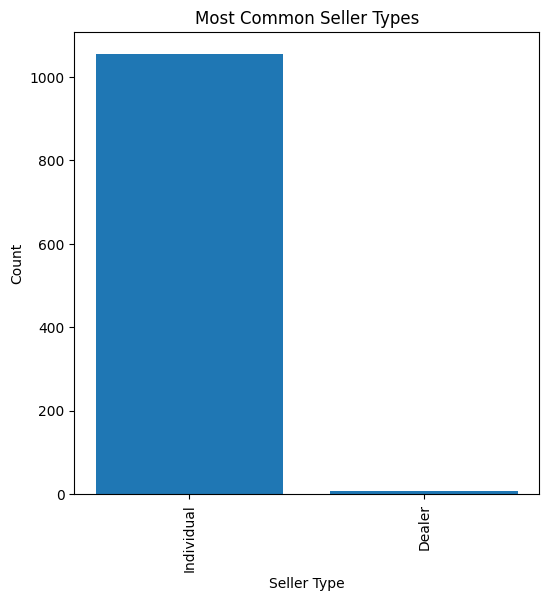

In [ ]:
#step 2 :

plt.figure(figsize=(6, 6))
plt.bar(seller_type_freq.index, seller_type_freq.values)
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.title('Most Common Seller Types')
plt.xticks(rotation=90)

# Show the plot
plt.show()

##Q4 : How many bikes have driven more than 50,000 kilometers?


Number of bikes that have driven more than 50000 kilometers: 170


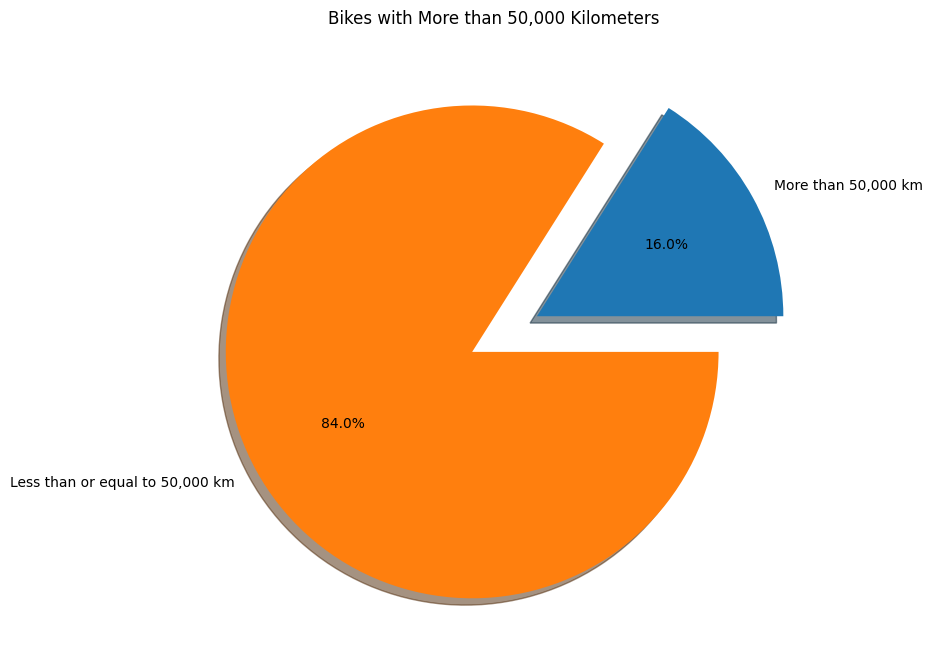

In [ ]:
#ans :

#step 1 :
def count_bikes_over_threshold(df, threshold):
    return (df['km_driven'] > threshold).sum()

threshold = 50000
count = count_bikes_over_threshold(df, threshold)

print(f"Number of bikes that have driven more than {threshold} kilometers: {count}")


#step 2 :

bikes_over_50k = df[df['km_driven'] > threshold] # Creating bikes_over_50k DataFrame
plt.figure(figsize=(8, 8))
plt.pie([len(bikes_over_50k), len(df) - len(bikes_over_50k)], labels=['More than 50,000 km', 'Less than or equal to 50,000 km'], autopct='%1.1f%%', shadow=True,explode=(0.2, 0.1))
plt.title('Bikes with More than 50,000 Kilometers')
plt.show()

##Q5 : What is the average km_driven value for each ownership type?

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


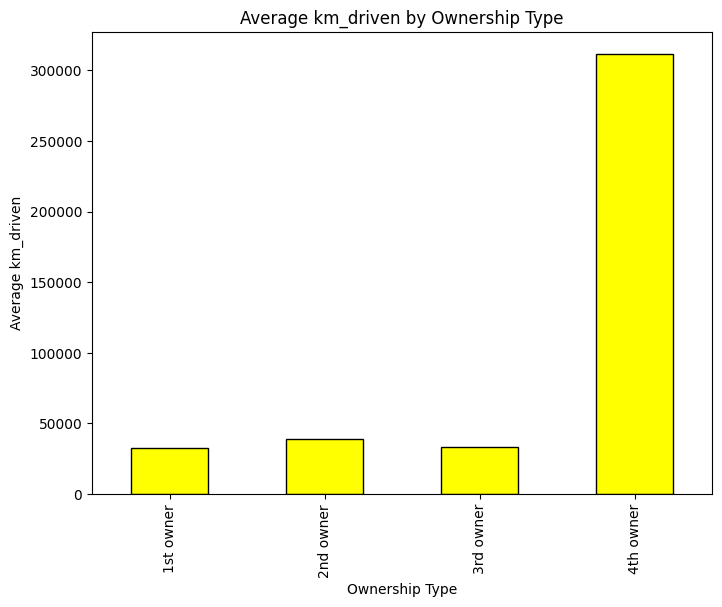

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('BIKE DETAILS.csv')
grouped_df = df.groupby('owner')
average_km_driven = grouped_df['km_driven'].mean()

print(average_km_driven)

#step 2 :

plt.figure(figsize=(8, 6))
average_km_driven.plot(kind='bar', facecolor='yellow', edgecolor = 'black')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.title('Average km_driven by Ownership Type')
plt.show()


#Q6 : What proportion of bikes are from the year 2015 or older?

Proportion of bikes from 2015 or older: 56.64%


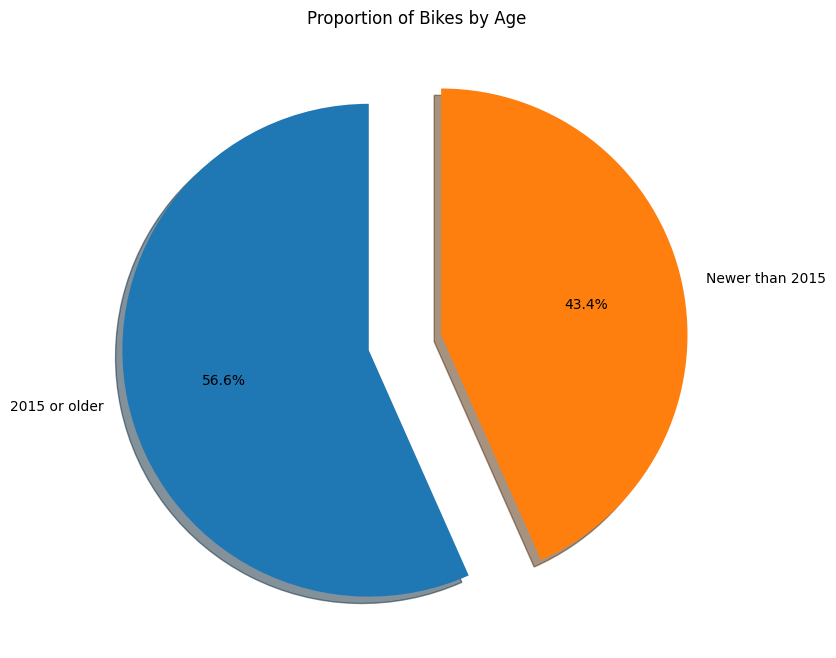

In [ ]:
#ans :

#step 1:


def calculate_proportion(df, year):

    num_bikes_year_or_older = (df['year'] <= year).sum()
    total_num_bikes = len(df)
    proportion = num_bikes_year_or_older / total_num_bikes
    return proportion

df = pd.read_csv('BIKE DETAILS.csv')

# Calculating the proportion
proportion = calculate_proportion(df, 2015)

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

bikes_2015_or_older = df[df['year'] <= 2015]

#step 2 :

plt.figure(figsize=(8, 8))
plt.pie([len(bikes_2015_or_older), len(df) - len(bikes_2015_or_older)],
        labels=['2015 or older', 'Newer than 2015'],
        autopct='%1.1f%%', startangle= 90, shadow=True,explode=(0.2, 0.1) )
plt.title('Proportion of Bikes by Age')
plt.show()

##Q7 : What is the trend of missing values across the dataset?

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


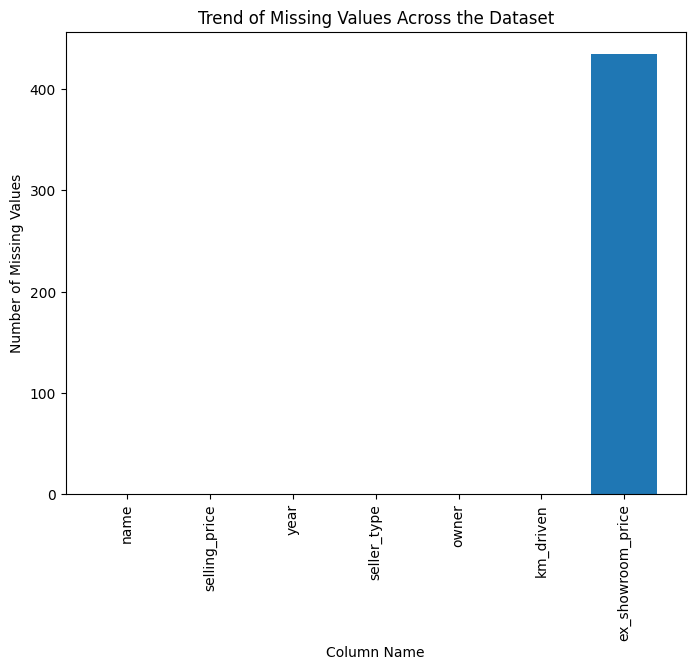

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('BIKE DETAILS.csv')
missing_values = df.isnull().sum()
print(missing_values)

#step 2 :

plt.figure(figsize=(8, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.title('Trend of Missing Values Across the Dataset')
plt.xticks(rotation=90)
plt.show()


##Q8 : What is the highest ex_showroom_price recorded, and for which bike?

                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


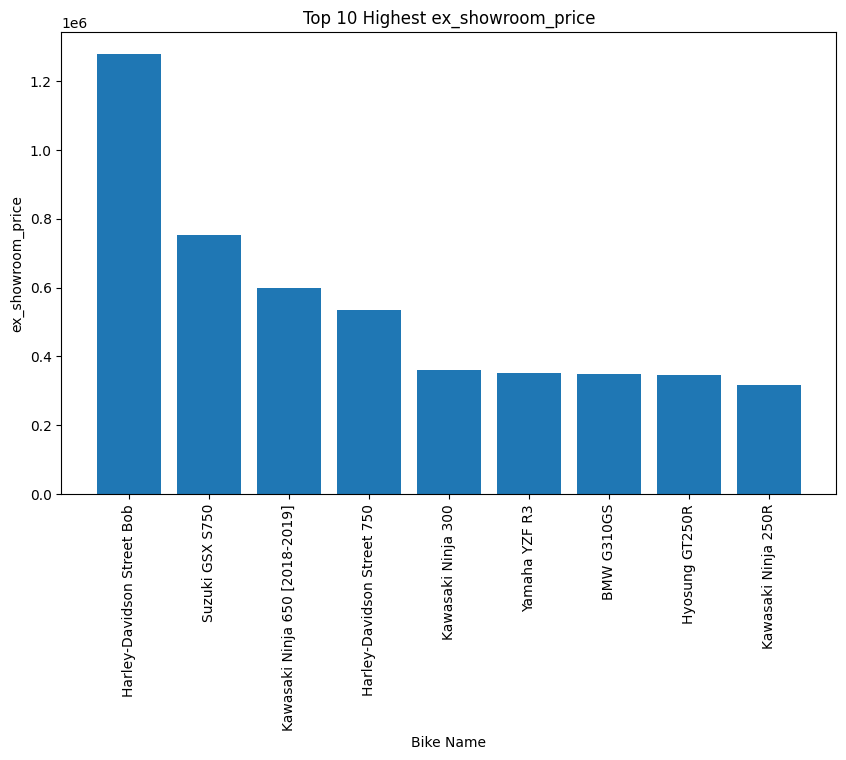

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('BIKE DETAILS.csv')
heighest_price = df['ex_showroom_price'].max() # Calculates the highest price
highest_price_bike = df[df['ex_showroom_price']== heighest_price] # Uses the calculated highest price
print(highest_price_bike)

#step 2 :

top_10_bikes = df.nlargest(10, 'ex_showroom_price')
plt.figure(figsize=(10, 6))
plt.bar(top_10_bikes['name'], top_10_bikes['ex_showroom_price'])
plt.xlabel('Bike Name')
plt.ylabel('ex_showroom_price')
plt.title('Top 10 Highest ex_showroom_price')
plt.xticks(rotation=90)
plt.show()

##Q9 : What is the total number of bikes listed by each seller type?


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


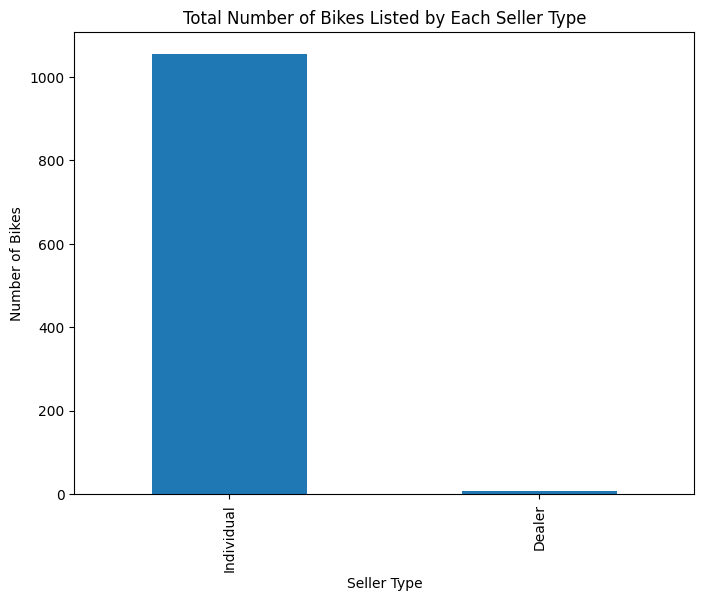

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('BIKE DETAILS.csv')

# making group of the data by seller type and count the number of bikes
seller_type_counts = df['seller_type'].value_counts()


print(seller_type_counts)


#step 2 :
plt.figure(figsize=(8, 6))
seller_type_counts.plot(kind='bar')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.title('Total Number of Bikes Listed by Each Seller Type')
plt.show()


##Q10 : What is the relationship between selling_price and km_driven for first-owner bikes?

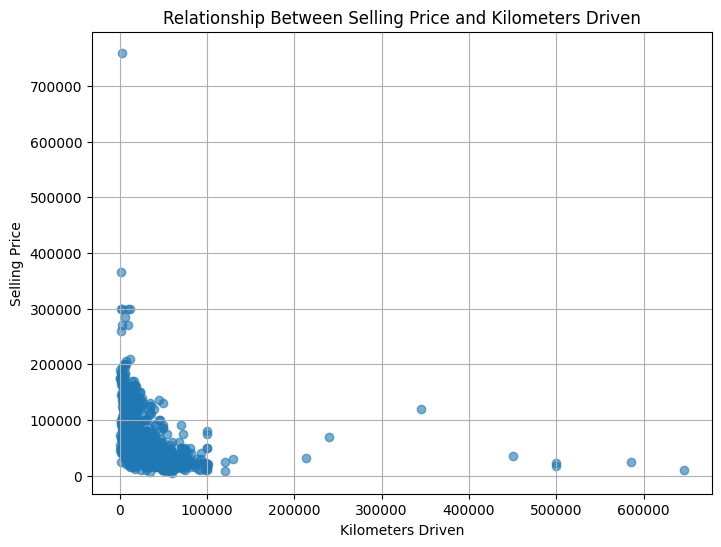

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')
first_owner_bikes = df[df['owner'] == '1st owner']
filtered_data = first_owner_bikes[['km_driven', 'selling_price']]
filtered_data = filtered_data.dropna()



#step 2 :
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['km_driven'], filtered_data['selling_price'], alpha=0.6)
plt.title("Relationship Between Selling Price and Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

##Q11 : Identify and remove outliers in the km_driven column using the IQR method?


In [ ]:
#ans :
#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')
km_driven = df['km_driven']
Q1 = km_driven.quantile(0.25)
Q3 = km_driven.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = km_driven[(km_driven < lower_bound) | (km_driven > upper_bound)]
data_cleaned = df[(km_driven >= lower_bound) & (km_driven <= upper_bound)]
print(data_cleaned)


                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

##Q12 : Perform a bivariate analysis to visualize the relationship between year and selling_price.

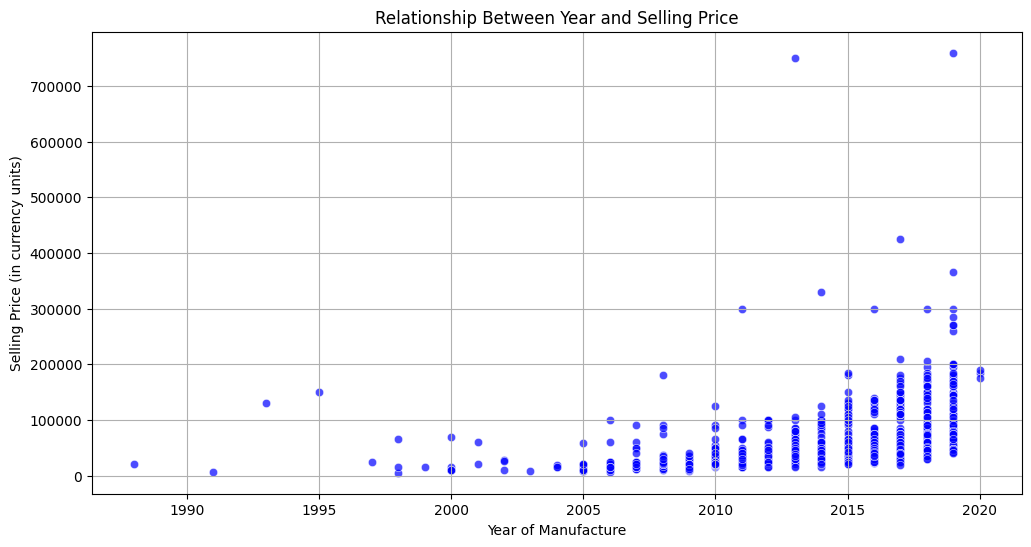

In [ ]:
#ans :
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_cleaned, x='year', y='selling_price', alpha=0.7, color='blue')
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (in currency units)')
plt.grid(True)
plt.show()

##Q13 : What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).

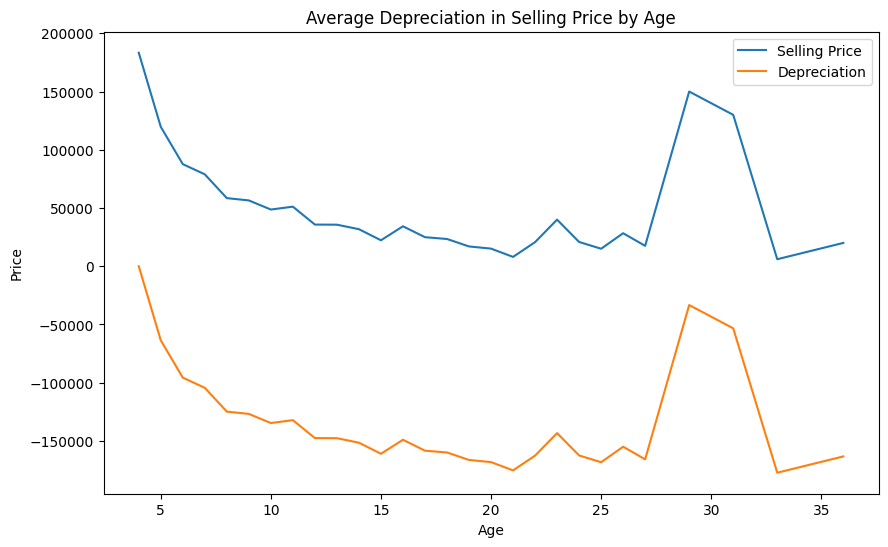

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')

# Calculating the bike's age
df['age'] = 2024 - df['year']

# making a group of the data by age
age_groups = df.groupby('age')['selling_price'].mean().reset_index()

# Calculating the depreciation
age_groups['depreciation'] = age_groups['selling_price'] - age_groups['selling_price'].max()

#step 2 :

plt.figure(figsize=(10,6))
plt.plot(age_groups['age'], age_groups['selling_price'], label='Selling Price')
plt.plot(age_groups['age'], age_groups['depreciation'], label='Depreciation')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Average Depreciation in Selling Price by Age')
plt.legend()
plt.show()

##Q14 : Which bike names are priced significantly above the average price for their manufacturing year?


In [ ]:
#ans :
#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')

# Calculating the average price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merging the average price with the original data
df = pd.merge(df, avg_price_by_year, on='year', suffixes=('', '_avg'))

# Calculating the price difference
df['price_diff'] = df['selling_price'] - df['selling_price_avg']

# Filtering  bike names with significant price differences
significant_bikes = df[df['price_diff'] > 0.2 * df['selling_price_avg']]

print(significant_bikes)

                                      name  selling_price  year seller_type  \
0                Royal Enfield Classic 350         175000  2019  Individual   
2      Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
13                           Yamaha YZF R3         365000  2019  Individual   
17                        Yamaha YZF R15 S          40000  2010  Individual   
...                                    ...            ...   ...         ...   
984              Royal Enfield Classic 500          95000  2014  Individual   
985              Royal Enfield Classic 500          90000  2011  Individual   
1005                    TVS Apache RTR 160          60000  2014  Individual   
1008                    Bajaj Pulsar 220 F          52000  2012  Individual   
1023                Bajaj Avenger 220 dtsi          45000  2012  Individual   

          owner  km_driven  ex_showroom_price  sell

##Q15 : Develop a correlation matrix for numeric columns and visualize it using a heatmap.

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


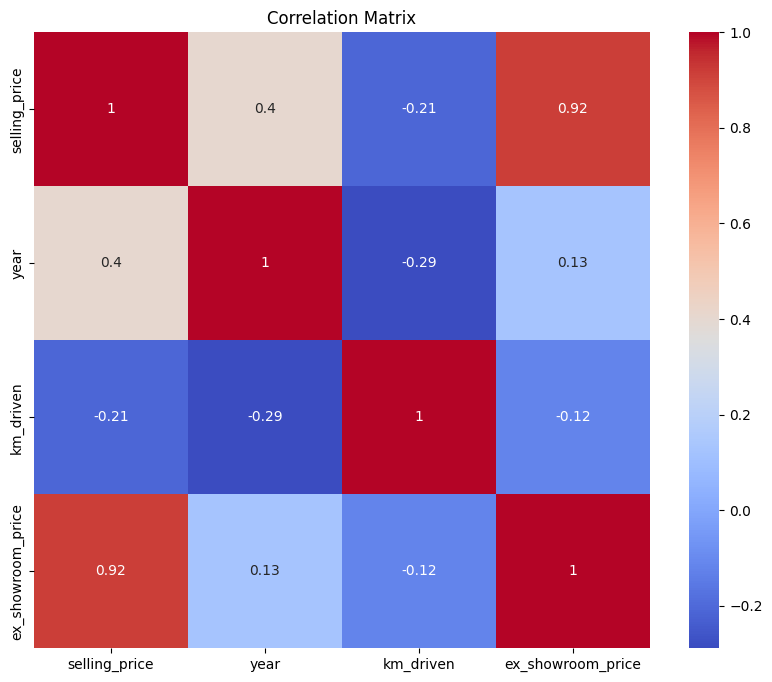

In [ ]:
#ans :

#step 1 :
df = pd.read_csv('BIKE DETAILS.csv')

# Selecting  numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating  the correlation matrix
corr_matrix = df[numeric_cols].corr()

print(corr_matrix)


#step 2 :
# Creating  a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#EDA - 2
#Title: Car Sale Dataset

##Source:

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


##Description:

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.



- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
- Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
- Customer Name: The name of the customer who purchased the car, represented as a string.
- Gender: The gender of the customer, categorized as "Male" or "Female.
- Annual Income: The customer's annual income in US dollars, represented as a numeric value.
- Dealer_Name: The name of the dealership selling the car, represented as a string.
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
- Model: The specific model name of the car, such as "Corolla," "Civic," etc.
- Engine: The engine type of the car, such as "V6," "I4," etc.
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue").
- Price ($): The selling price of the car in US dollars.
- Dealer_No: A unique identifier for each car dealer in the dataset.
- Body Style: The body style of the car, such as "Sedan," "SUV," etc.
- Phone: The phone number of the customer who purchased the car.
- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [ ]:
#all lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.read_csv('Car Sale.csv')

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


##Questions & answers :

##Q1 : What is the average selling price of cars for each dealer, and how does it compare across different dealers?  

Columns in the DataFrame: Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
                                        Dealer_Name     Price ($)
27                                        U-Haul CO  28769.919006
5                                     Classic Chevy  28602.014446
19                             Rabun Used Car Sales  28527.536177
11                                  Iceberg Rentals  28522.958533
8                             Enterprise Rent A Car  28312.580800
23                Scrivener Performance Engineering  28297.371589
9                        Gartner Buick Hyundai Saab  28247.621019
22                                 Saab-Belle Dodge  28190.139888
2                                       Capitol KIA  28189.703822
20                                    Race Car Help  28163.372706
4    

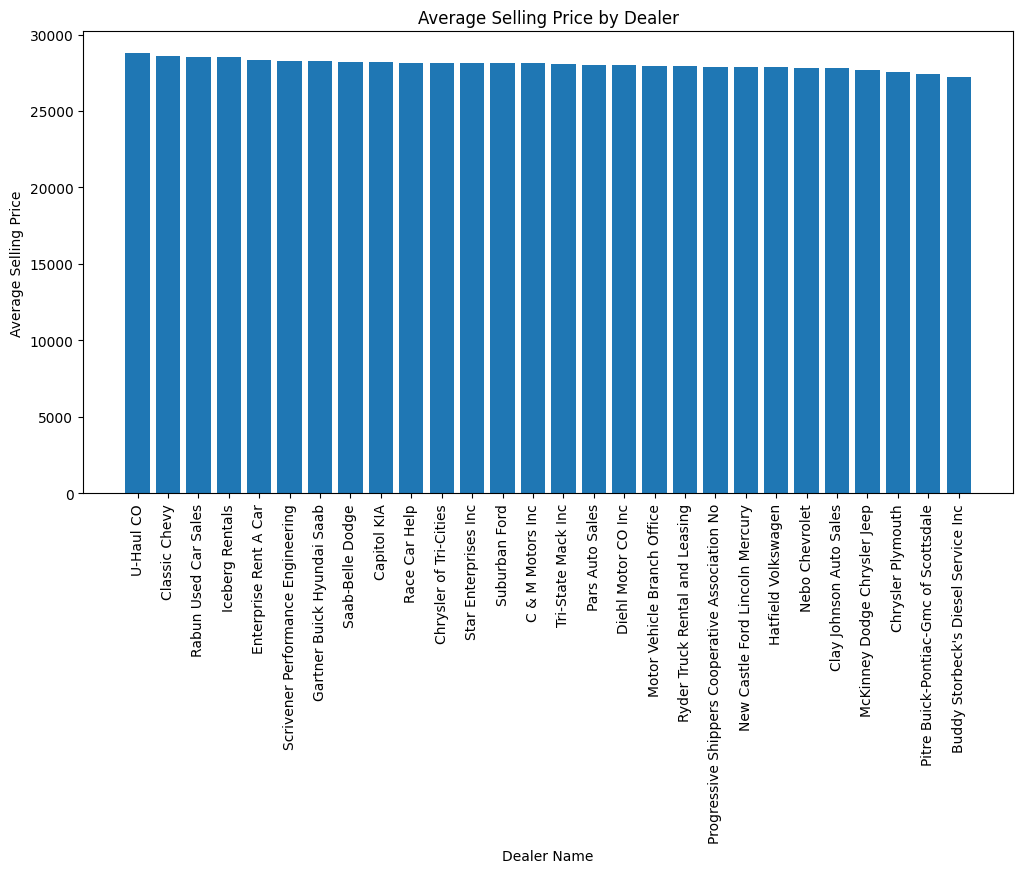

In [ ]:
#ans :
#step 1 :

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

# Printing the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# making a group by the correct column name for dealer (replace 'Dealer_Name' if needed) and calculating the average selling price
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sorting the dealers by average selling price in descending order
avg_price_by_dealer = avg_price_by_dealer.sort_values(by='Price ($)', ascending=False)

print(avg_price_by_dealer)


#step 2 :

#a bar chart to compare the average selling prices across dealers
plt.figure(figsize=(12,6))
plt.bar(avg_price_by_dealer['Dealer_Name'], avg_price_by_dealer['Price ($)'])
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Dealer')
plt.xticks(rotation=90)
plt.show()

##Q2 :  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?


       Company     Price ($)
15     Lincoln  19658.050211
24        Saab  19653.740089
4     Cadillac  19517.120220
21    Plymouth  19065.997338
14       Lexus  17852.923492
3        Buick  17142.232626
17     Mercury  16445.172195
19      Nissan  16214.264017
25      Saturn  15990.223671
8         Ford  15849.090227
16  Mercedes-B  15722.807459
20  Oldsmobile  15711.345857
27      Toyota  15367.131714
2          BMW  15065.578723
22     Pontiac  14348.963592
11    Infiniti  13696.332844
5    Chevrolet  13311.063223
29       Volvo  12933.790185
26      Subaru  12920.771620
1         Audi  12904.243867
28  Volkswagen  12527.124011
18  Mitsubishi  11671.343035
6     Chrysler  11583.286811
7        Dodge  11187.592085
9        Honda  11148.629062
12      Jaguar  10222.531533
13        Jeep   9459.834418
0        Acura   8183.046414
23     Porsche   5261.839206
10     Hyundai   3485.982649


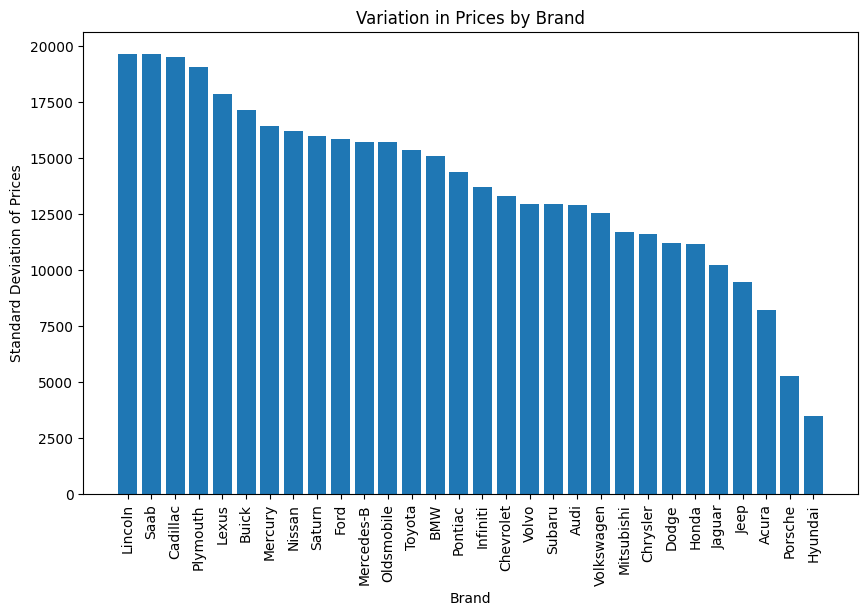

In [ ]:
#ans :

#step 1 :

df = pd.read_csv('Car Sale.csv')

# Group the data by brand and calculate the standard deviation of prices
std_dev_by_brand = df.groupby('Company')['Price ($)'].std().reset_index()

# Sort the brands by standard deviation in descending order
std_dev_by_brand = std_dev_by_brand.sort_values(by='Price ($)', ascending=False)

# Print the standard deviation of prices for each brand
print(std_dev_by_brand)

#step 2 :


# Create a bar chart to compare the standard deviation of prices across brands
plt.figure(figsize=(10,6))
plt.bar(std_dev_by_brand['Company'], std_dev_by_brand['Price ($)'])
plt.xlabel('Brand')
plt.ylabel('Standard Deviation of Prices')
plt.title('Variation in Prices by Brand')
plt.xticks(rotation=90)
plt.show()

##Q3 : What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?


                 0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


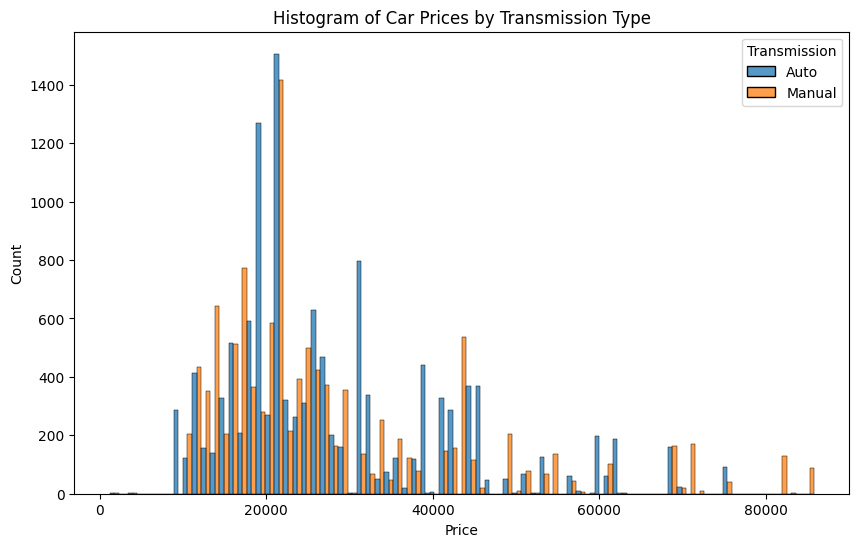

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')

transmission_groups = df.groupby('Transmission')

transmission_stats = transmission_groups['Price ($)'].agg(['mean', 'median', 'std'])

#Calculating interquartile range (IQR) for each transmission type
transmission_iqr = transmission_groups['Price ($)'].quantile([0.25, 0.75]).unstack()
transmission_iqr['IQR'] = transmission_iqr[0.75] - transmission_iqr[0.25]

print(transmission_iqr)


#step 2 :

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Price ($)', hue='Transmission', multiple='dodge')
plt.title('Histogram of Car Prices by Transmission Type')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##Q4 : What is the distribution of car prices across different regions?

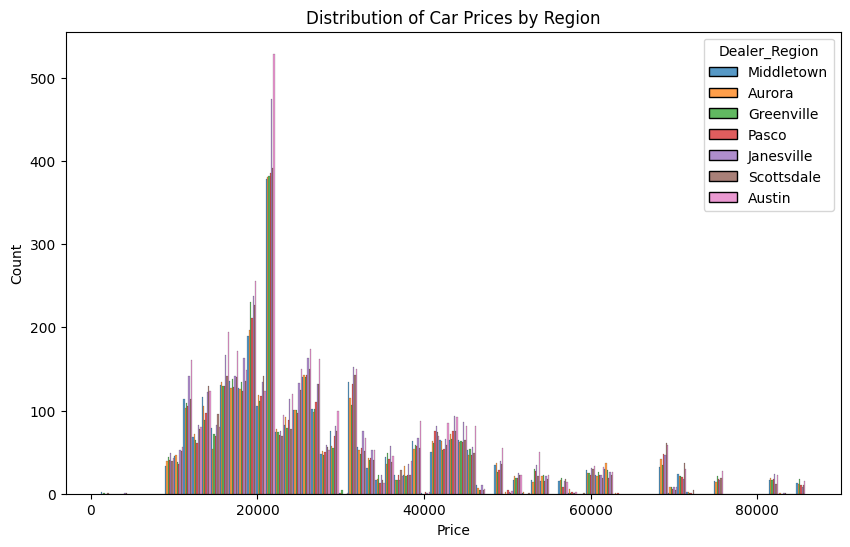

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')

#making a group of the data by region
region_groups = df.groupby('Dealer_Region')

# Calculating summary statistics
region_stats = region_groups['Price ($)'].agg(['mean', 'median', 'std'])


#step 2 :

#Histogram:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Price ($)', hue='Dealer_Region', multiple='dodge')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##Q5 : What is the distribution of cars based on body styles?

  body_style  count  percentage  cumulative_percentage
0        SUV   6374   26.662762              26.662762
1  Hatchback   6128   25.633732              52.296495
2      Sedan   4488   18.773530              71.070024
3  Passenger   3945   16.502133              87.572158
4    Hardtop   2971   12.427842             100.000000


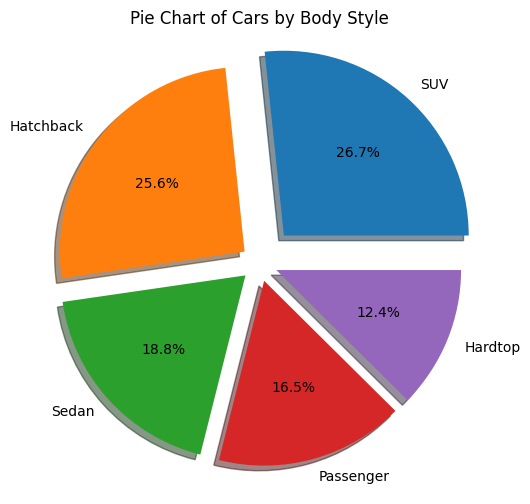

In [ ]:
#ans :
#step 1 :
import pandas as pd
df = pd.read_csv('Car Sale.csv')

#making a group of the data by body style
body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['body_style', 'count']

# Calculating percentage and cumulative percentage
body_style_counts['percentage'] = body_style_counts['count'] / body_style_counts['count'].sum() * 100
body_style_counts['cumulative_percentage'] = body_style_counts['percentage'].cumsum()

print(body_style_counts)

#step 2 :
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
#Modified the explode parameter
plt.pie(body_style_counts['count'], labels=body_style_counts['body_style'], autopct='%1.1f%%', shadow=True,explode=(0.2, 0.1, 0.1, 0.1, 0.1))
plt.title('Pie Chart of Cars by Body Style')
plt.show()

##Q6 :  How does the average selling price of cars vary by customer gender and annual income?

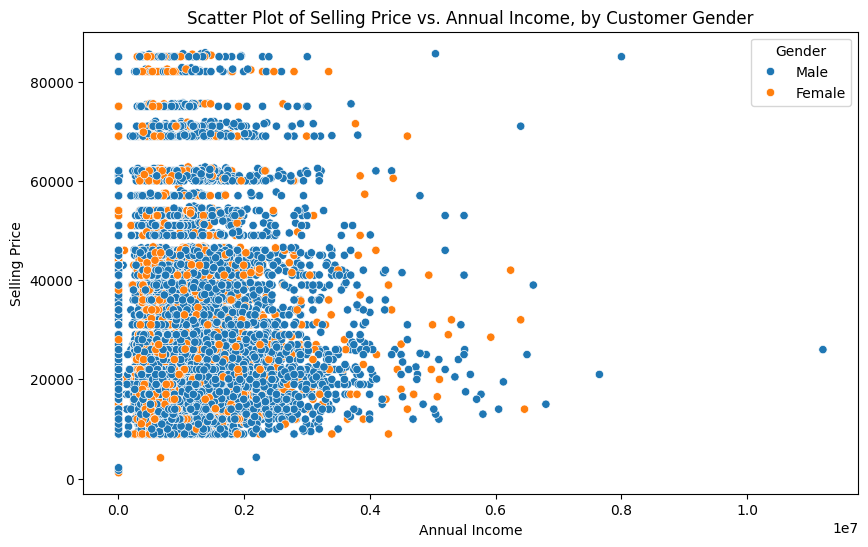

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')

#making a group of the data by customer gender and annual income
avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

#step 2 :

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
plt.xlabel('Annual Income')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Selling Price vs. Annual Income, by Customer Gender')
plt.show()

##Q7 : What is the distribution of car prices by region, and how does the number of cars sold vary by region?

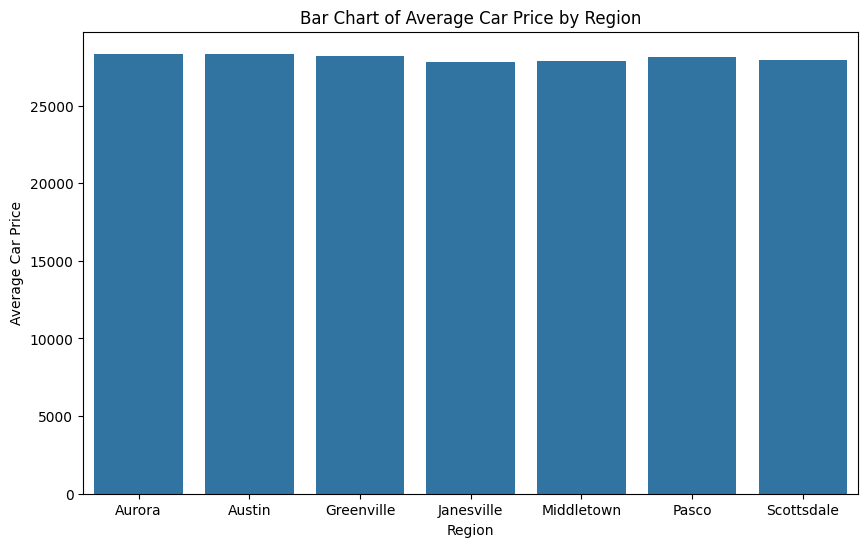

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('Car Sale.csv')

# making a group of the data by region
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'median', 'count']).reset_index()

#step 2 :

plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='mean', data=region_stats) # Changed 'region' to 'Dealer_Region'
plt.xlabel('Region')
plt.ylabel('Average Car Price')
plt.title('Bar Chart of Average Car Price by Region')
plt.show()

##Q8 : How does the average car price differ between cars with different engine sizes?

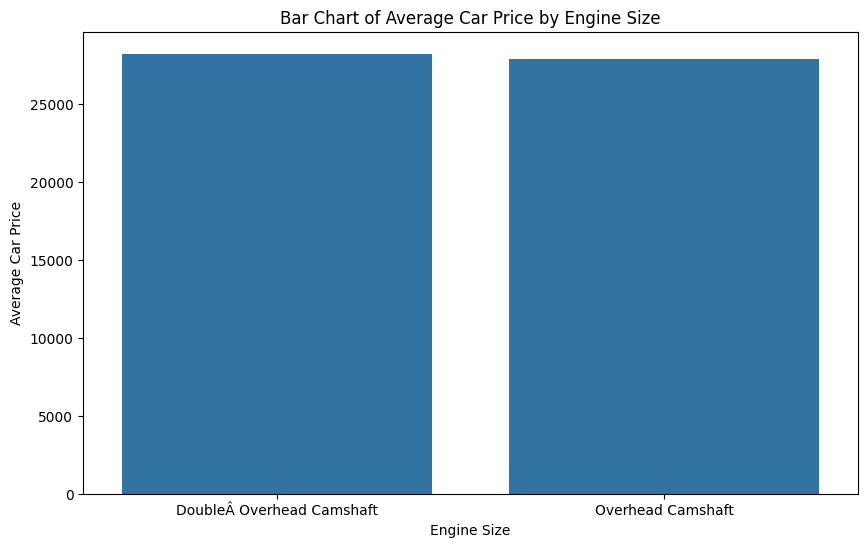

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('Car Sale.csv')

engine_size_groups = df.groupby('Engine')['Price ($)'].mean().reset_index()

#step 2 :

plt.figure(figsize=(10, 6))
sns.barplot(x='Engine', y='Price ($)', data=engine_size_groups)
plt.xlabel('Engine Size')
plt.ylabel('Average Car Price')
plt.title('Bar Chart of Average Car Price by Engine Size')
plt.show()

##Q9 : How do car prices vary based on the customer’s annual income bracket?


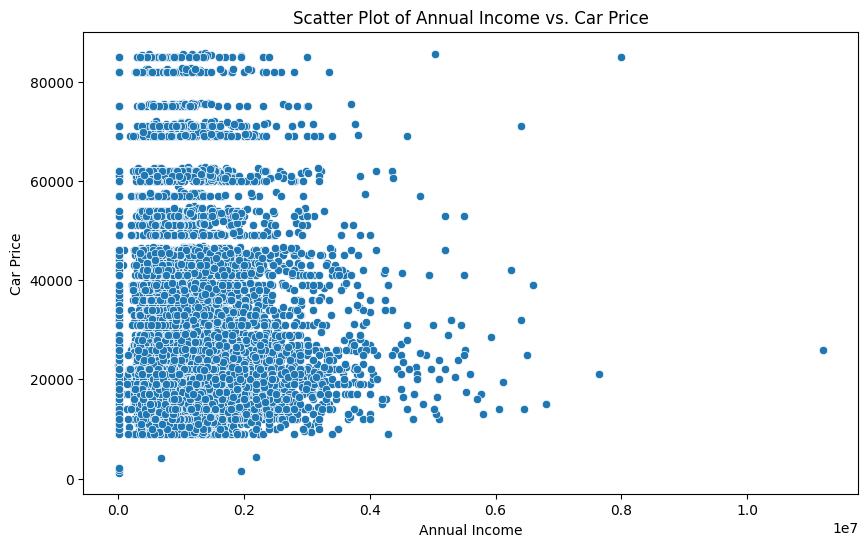

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')

income_bracket_groups = df.groupby('Annual Income')['Price ($)'].agg(['mean', 'median', 'std']).reset_index()

#step 2 :

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df,)
plt.xlabel('Annual Income')
plt.ylabel('Car Price')
plt.title('Scatter Plot of Annual Income vs. Car Price')
plt.show()

##Q10 : What are the top 5 car models with the highest number of sales, and how does their price distribution look?

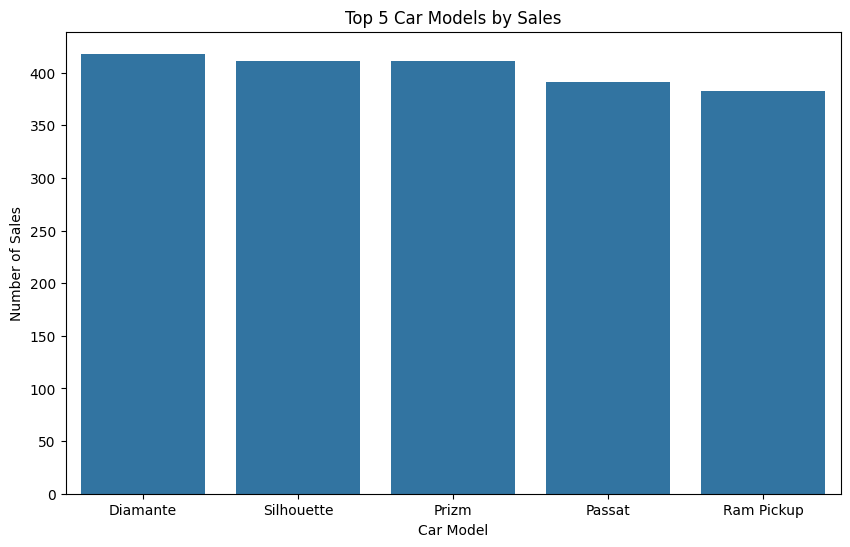

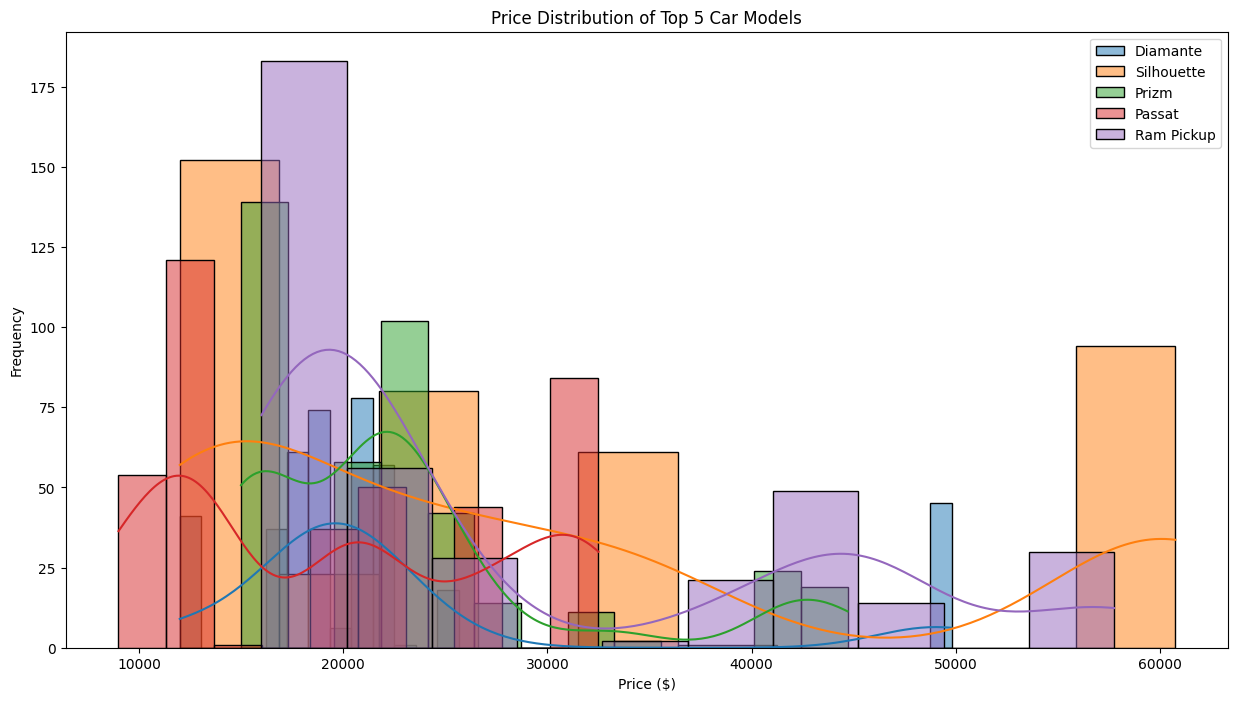

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')
car_model_sales = df.groupby('Model')['Price ($)'].agg(['count', 'mean', 'std']).reset_index()

# Sorting the count to find the top 5 models
car_model_sales = car_model_sales.sort_values(by='count', ascending=False)
top_5_car_models = car_model_sales.head(5)


#step 2 :

# Creating a bar chart of top 5 models by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='count', data=top_5_car_models)
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.title('Top 5 Car Models by Sales')
plt.show()

# Displaying the price distribution for each of top 5 car models
plt.figure(figsize=(15, 8))
for model in top_5_car_models['Model']:
    model_data = df[df['Model'] == model]
    sns.histplot(model_data['Price ($)'], label=model, kde=True)
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution of Top 5 Car Models')
plt.legend()
plt.show()

##Q11 :  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

        Color                     Engine     Price ($)
0       Black  DoubleÂ Overhead Camshaft  25766.451103
1       Black          Overhead Camshaft  31732.967164
2  Pale White  DoubleÂ Overhead Camshaft  30347.987460
3  Pale White          Overhead Camshaft  24327.767694
4         Red  DoubleÂ Overhead Camshaft  27434.392314


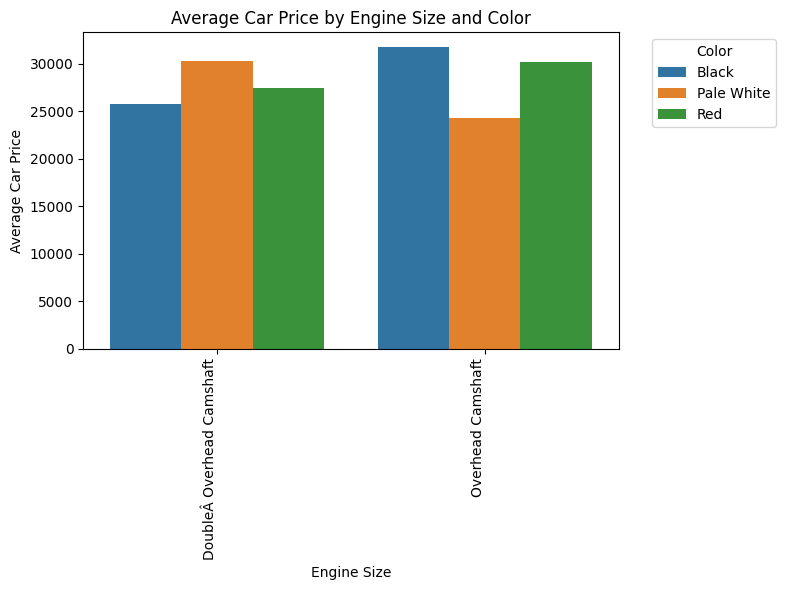

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


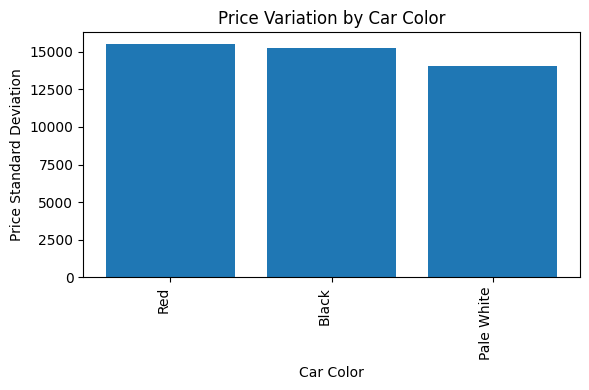

In [ ]:
#ans :
#step 1 :

df = pd.read_csv('Car Sale.csv')
average_price_by_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].mean().reset_index()
print(average_price_by_color_engine.head())

#step 2 :

plt.figure(figsize=(8, 6))
sns.barplot(x='Engine', y='Price ($)', hue='Color', data=average_price_by_color_engine)
plt.xlabel('Engine Size')
plt.ylabel('Average Car Price')
plt.title('Average Car Price by Engine Size and Color')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Calculating price variations by color
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color = price_variation_by_color.sort_values(by='Price ($)', ascending=False)
print(price_variation_by_color)


#visualizing this using a bar chart
plt.figure(figsize=(6, 4))
plt.bar(price_variation_by_color['Color'], price_variation_by_color['Price ($)'])
plt.xlabel('Car Color')
plt.ylabel('Price Standard Deviation')
plt.title('Price Variation by Car Color')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

##Q12 : Is there any seasonal trend in car sales based on the date of sale?

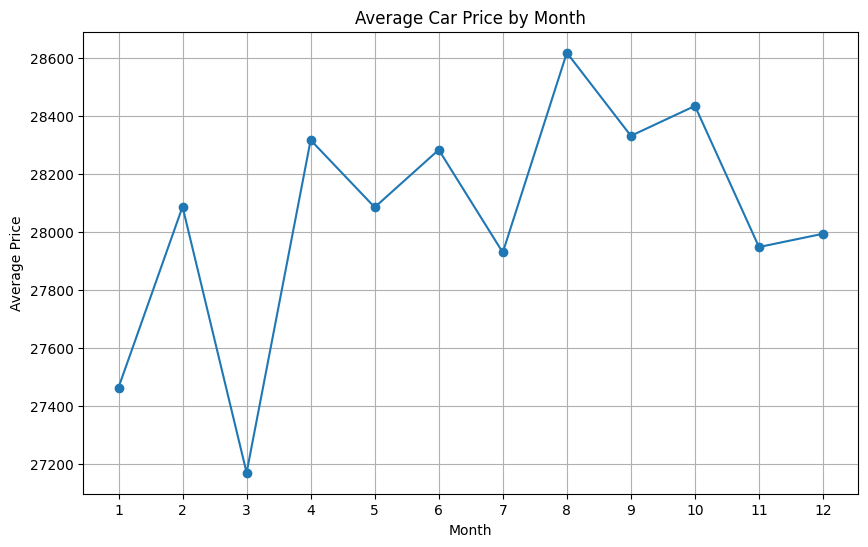

In [ ]:
#ans :
#step 1 :
#Analyzing the Seasonal Trends in the given data.

df = pd.read_csv('Car Sale.csv')
df['Date'] = pd.to_datetime(df['Date'])
#extracting the month from the date
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Price ($)'].mean().reset_index()


#step 2 :
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Month'], sales_by_month['Price ($)'], marker='o')
plt.title('Average Car Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

##Q13 : How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('Car Sale.csv')
grouped_prices = df.groupby(['Body Style', 'Transmission'])['Price ($)'].agg(['mean', 'median', 'std']).reset_index()
print(grouped_prices.head())

  Body Style Transmission          mean   median           std
0    Hardtop         Auto  31520.188210  27000.0  13687.756740
1    Hardtop       Manual  27016.943698  22001.0  14072.501848
2  Hatchback         Auto  25910.544824  21500.0  13144.014337
3  Hatchback       Manual  28702.550562  23000.0  16284.049616
4  Passenger         Auto  28915.835149  25000.0  13946.481932


##Q14 : What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

                Price ($)  Engine_Encoded  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_Encoded  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


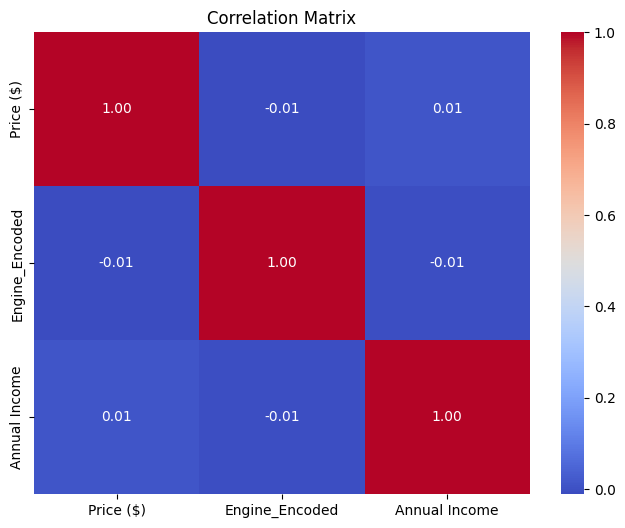

In [ ]:
#ans :
#step 1 :
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Car Sale.csv')

# Handling missing values: for the sake of simplicity, replace with 0 or most frequent
df['Engine'].fillna(df['Engine'].mode()[0], inplace = True)
df['Annual Income'].fillna(0, inplace = True)

# Label encode engine
label_encoder = LabelEncoder()
df['Engine_Encoded'] = label_encoder.fit_transform(df['Engine'])

correlation_matrix = df[['Price ($)', 'Engine_Encoded', 'Annual Income']].corr()
print(correlation_matrix)

#step 2 :

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##Q15 : How does the average car price vary across different car models and engine types?

    Model                     Engine     Price ($)
0   3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1  3000GT  DoubleÂ Overhead Camshaft  22764.326923
2  3000GT          Overhead Camshaft  21770.659864
3    300M  DoubleÂ Overhead Camshaft  21394.888889
4    323i  DoubleÂ Overhead Camshaft  16744.632287


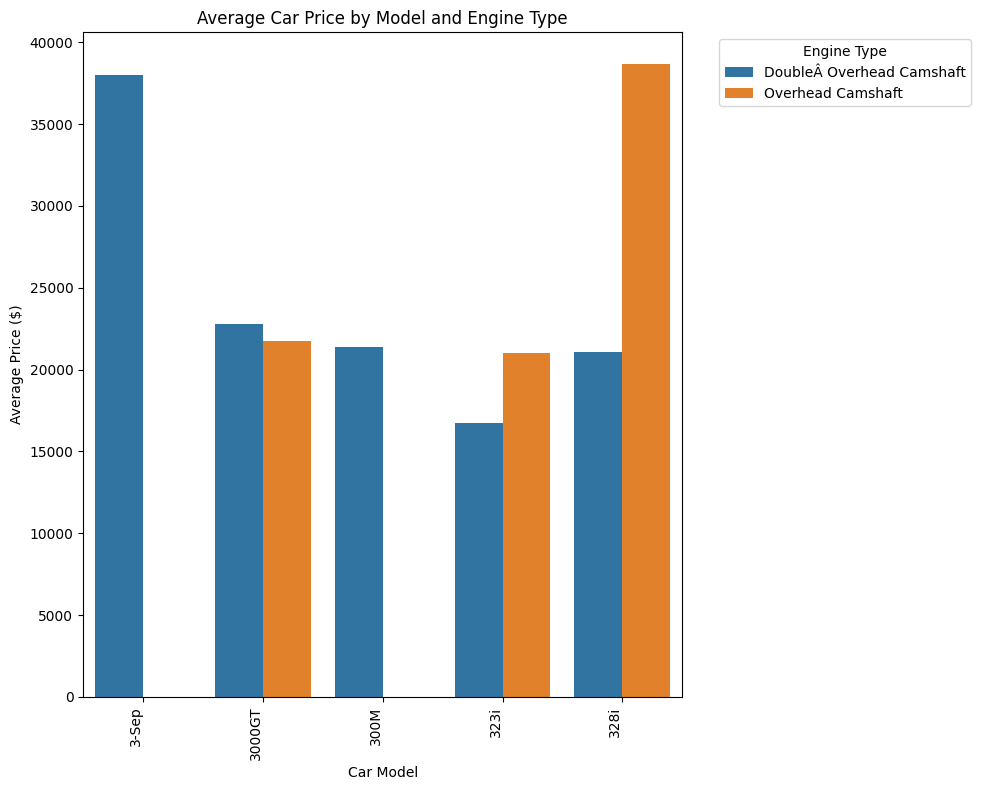

In [ ]:
#ans :
#step 1 :
df = pd.read_csv('Car Sale.csv')

average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(average_price_by_model_engine.head())


#step 2 :
models_to_plot = average_price_by_model_engine['Model'].unique()[:5]
filtered_data = average_price_by_model_engine[average_price_by_model_engine['Model'].isin(models_to_plot)]

plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=filtered_data)
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Model and Engine Type')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#EDA - 3


#Title : Amazon Sales Data

##Description:

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

##Features:

- product_id: Unique identifier for each product

- product_name: Name of the product

- category: Category of the product

- discounted_price: Discounted price of the product

- actual_price: Actual price of the product

- discount_percentage: Percentage of discount for the product

- rating: Rating of the product (1-5)

- rating_count: Number of people who voted for the Amazon rating

- about_product: Description about the product

- user_id: ID of the user who wrote the review

- user_name: Name of the user who wrote the review

- review_id: ID of the user review

- review_title: Short review

- review_content: Long review

- img_link: Image link of the product

- product_link: Official website link of the produc


In [1]:
#all lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.read_csv('amazon.csv')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

##Questions & answers :  

##Q1 : What is the average rating for each product category?

In [ ]:
#ans :

df = pd.read_csv('amazon.csv')

# Converting 'rating' column to numeric before calculating the mean
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# making a group data by category and calculate average rating
average_ratings = df.groupby('category')['rating'].mean().reset_index()

print(average_ratings)


                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


##Q2 :  What are the top rating_count products by category?

In [ ]:
#ans :

df = pd.read_csv('amazon.csv')

# Converting 'rating' to numeric if it's not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculating rating count for each product within its category
df['rating_count'] = df.groupby('category')['rating'].transform('count')

top_products = df.loc[df.groupby('category')['rating_count'].idxmax()]

#the result
print(top_products[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...             1  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...             2  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...             1  
748

##Q3 : What is the distribution of discounted prices vs. actual prices?


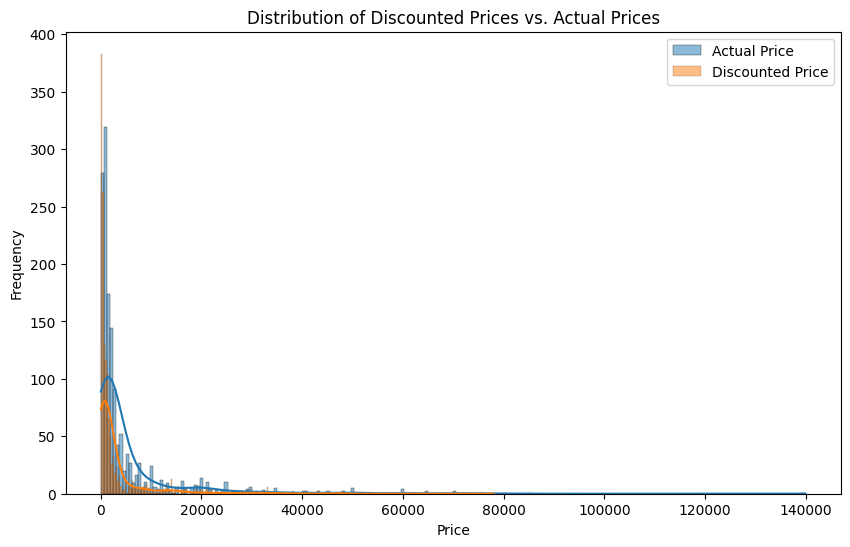

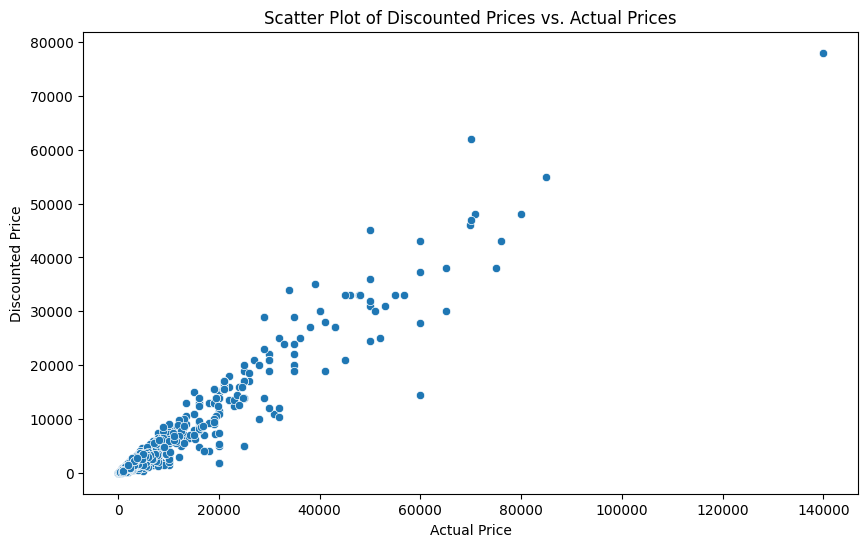

In [ ]:
#ans :

#step 1 :
df = pd.read_csv('amazon.csv')

# Convert price columns to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')


# step 2 :

#histogram to visualize the distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], label='Actual Price', kde=True)
sns.histplot(df['discounted_price'], label='Discounted Price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.legend()
plt.show()


#a scatter plot to compare the prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.title('Scatter Plot of Discounted Prices vs. Actual Prices')
plt.show()

##Q4 : How does the average discount percentage vary across categories?

In [ ]:
#ans :
df = pd.read_csv('amazon.csv')

# Converting price columns to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace(',', '').str.replace('₹', ''), errors='coerce')

# Calculating discount percentage
df['discount_percentage'] = (df['actual_price'] - df['discounted_price']) / df['actual_price'] * 100

# Calculating average discount percentage by category
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

print(avg_discount_by_category)


                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...            41.525000
1    Computers&Accessories|Accessories&Peripherals|...            78.387733
2    Computers&Accessories|Accessories&Peripherals|...            35.035035
3    Computers&Accessories|Accessories&Peripherals|...            56.335120
4    Computers&Accessories|Accessories&Peripherals|...            46.719582
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...             5.000000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...            17.619048
209  OfficeProducts|OfficePaperProducts|Paper|Stati...            13.074074
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...             0.000000

[211 rows x 2 columns]


##Q5 :  What are the most popular product names?


In [ ]:
#ans :

df = pd.read_csv('amazon.csv')

# Converting the 'rating' column to numeric and handling errors by setting them to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filtering the top-rated products
top_products = df.nlargest(10, 'rating')
product_names = top_products['product_name'].tolist()

print(product_names)

['Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)', 'REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White', 'Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop', 'Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))', 'Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)', 'Inst

##Q6 : What are the most popular product keywords?

In [ ]:
#ans :

from collections import Counter
import re

df = pd.read_csv('amazon.csv')

# Checking the actual column names in your DataFrame
print(df.columns)

# Replacing 'title' with the actual column name containing product titles
# Assuming the column name is 'product_name' based on the provided CSV structure

# Initializing keywords as an empty list before the loop
keywords = []
for title in df['product_name']:
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title).lower()
    words = title.split()
    keywords.extend(words)

keyword_counts = Counter(keywords)

# Getting the top N most popular keywords
top_keywords = keyword_counts.most_common(10)

# the popular keywords
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
with: 752
for: 674
black: 468
cable: 401
usb: 390
and: 330
charging: 246
to: 218
fast: 211
c: 188


##Q7 : What are the most popular product reviews?

In [ ]:
#ans :

df = pd.read_csv('amazon.csv')

# Converting the 'rating' column to numeric and handling errors by setting them to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filtering the top-rated products
top_products = df.nlargest(10, 'rating')  # Adjust the number (10 here) to see more or fewer

# Displaying the results
print(top_products[['product_name', 'rating', 'review_content']])

                                           product_name  rating  \
174   Syncwire LTG to USB Cable for Fast Charging Co...     5.0   
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0   
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0   
1145  Swiffer Instant Electric Water Heater Faucet T...     4.8   
1201  Oratech Coffee Frother electric, milk frother ...     4.8   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8   
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7   
459   Spigen EZ Fit Tempered Glass Screen Protector ...     4.7   
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...     4.7   
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...     4.7   

                                         review_content  
174   Product is good in quality. Working good with ...  
324   Quick delivery.Awesome ProductPacking was good...  
775   I really like this wireless mouse it has becam...  
1145  Must buy best Fabulous p

##Q8 : What is the correlation between discounted_price and rating?

Correlation between discounted_price and rating: 0.12


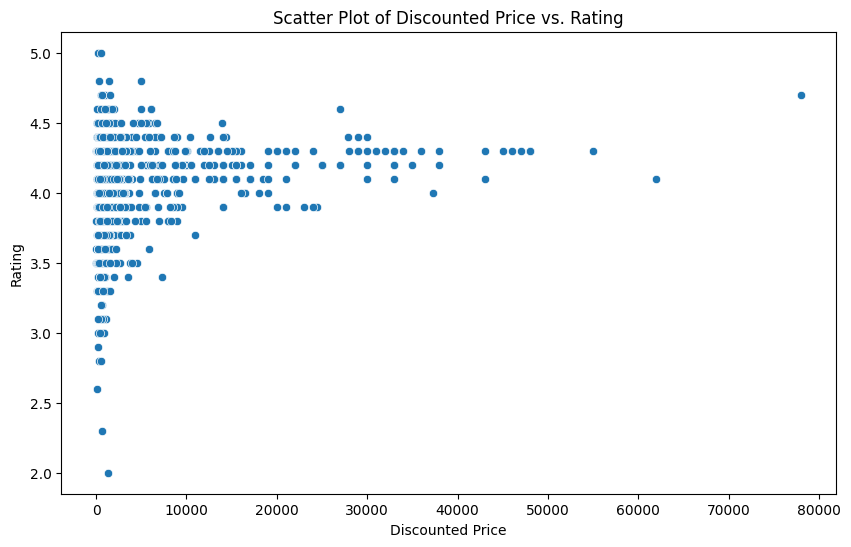

In [ ]:
#ans :
#step 1 :


df = pd.read_csv('amazon.csv')

# Cleaning and converting 'discounted_price' to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Converting 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculating the correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])

# Printing the correlation
print(f"Correlation between discounted_price and rating: {correlation:.2f}")

#step 2 :

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Discounted Price vs. Rating')
plt.show()

##Q9 : What are the Top 5 categories based on the highest ratings?

                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


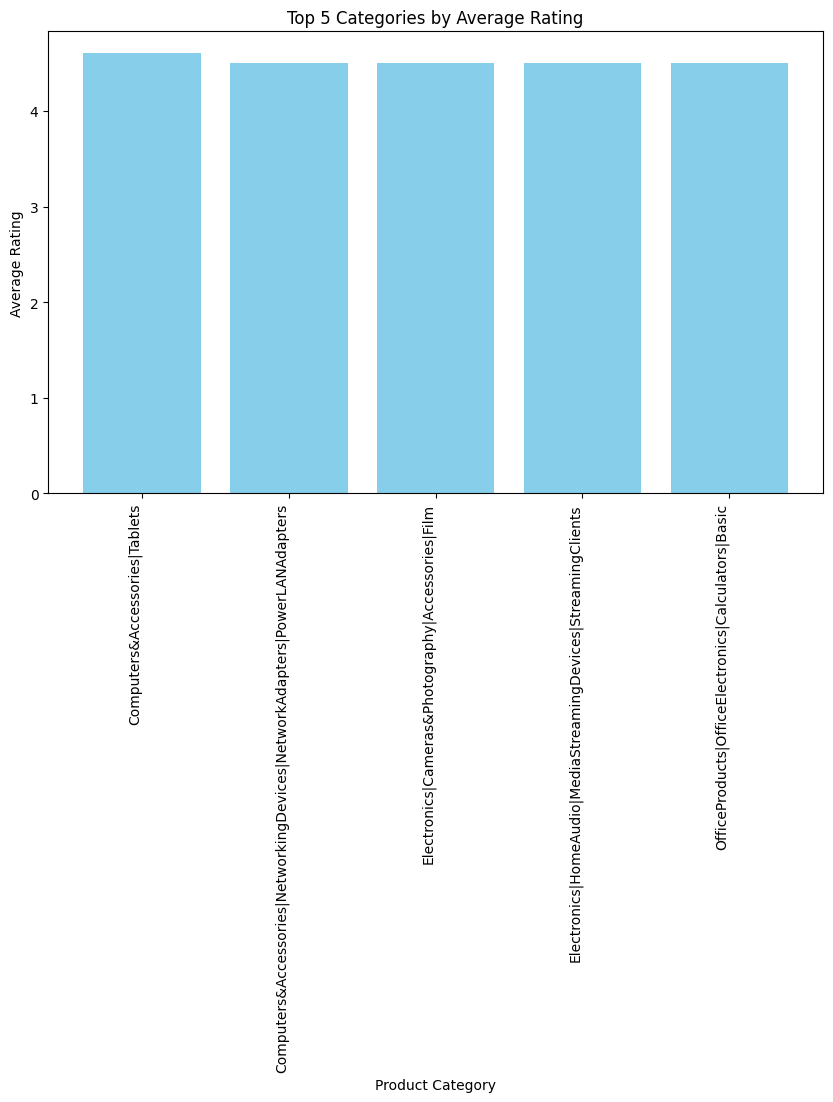

In [4]:
#ans :
#step 1 :

df = pd.read_csv('amazon.csv')

# Converting 'rating' column to numeric and coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculating average rating for each category
average_ratings = df.groupby('category')['rating'].mean().reset_index()

sorted_categories = average_ratings.sort_values(by='rating', ascending=False)

#the top 5 categories
top_5_categories = sorted_categories.head(5)

print(top_5_categories)


#step 2 :

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['category'], top_5_categories['rating'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.title('Top 5 Categories by Average Rating')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


##Q10 : Identify any potential areas for improvement or optimization based on the data analysis.

####ans :
###General Areas for Improvement Across Datasets :

####Amazon Dataset -

####Product Performance:

- Issue: Some categories have higher ratings than others.
- Improvement:
Identify categories with lower ratings and explore reasons for poor performance.
Provide targeted support to products in categories with high discounts to drive more sales.

####Discount Strategy:

- Issue: There are different discount percentage across categories
- Improvement:
Adjust the discount strategy based on product category to optimize the sales and revenue.

####Review Analysis:

- Issue: Review analysis based on keywords only
- Improvement
Perform sentiment analysis of the reviews to find the most liked and disliked features.
Extract popular features or issues of products using NLP, which could improve product development.


####Keyword Analysis:

- Issue: The keywords from the reviews are only counted.
- Improvement:
Analyze keywords in reviews with negative sentiment to identify areas for product improvement.


#EDA - 3


##SPOTIFY DATA : POPULAR HIP-HOP ARTISTS AND TRACKS.


##Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


##Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.


##Column Descriptors:


- Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

- Track Name: The title of the track, encapsulating its identity and essence.

- Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

- Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

- Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration

In [1]:
#all lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.read_csv('spotify.csv')

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


##Q1 : Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [3]:
#ans :
df = pd.read_csv('spotify.csv')

# Checking for the null values
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

# Handling null values (e.g., fill with mean, median, or mode)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Checking the duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

#duplicate rows (e.g., drop duplicates)
df.drop_duplicates(inplace=True)


Null Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate Rows: 27


##Q2 : What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


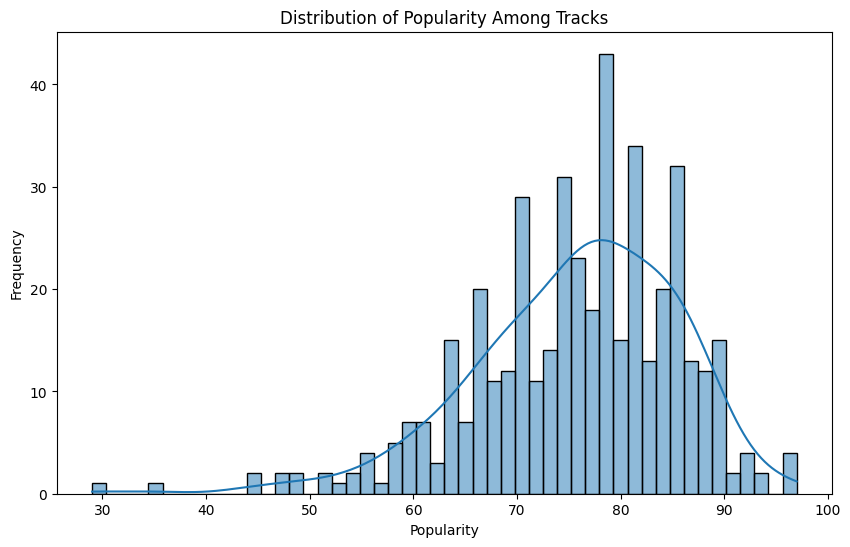

In [4]:
#ans :
#step 1 :

df = pd.read_csv('spotify.csv')
# Checking for the correct column name (case-sensitive)
print(df.columns)


#step 2 :


# A histogram to visualize the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=50, kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

####Here's the histogram showing the distribution of popularity among the tracks:

- The distribution appears to be right-skewed, meaning more tracks have lower popularity scores.
- A few tracks have very high popularity, but they are in the minority.
- The density curve (KDE) helps visualize the overall trend.

##Q3 : Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.


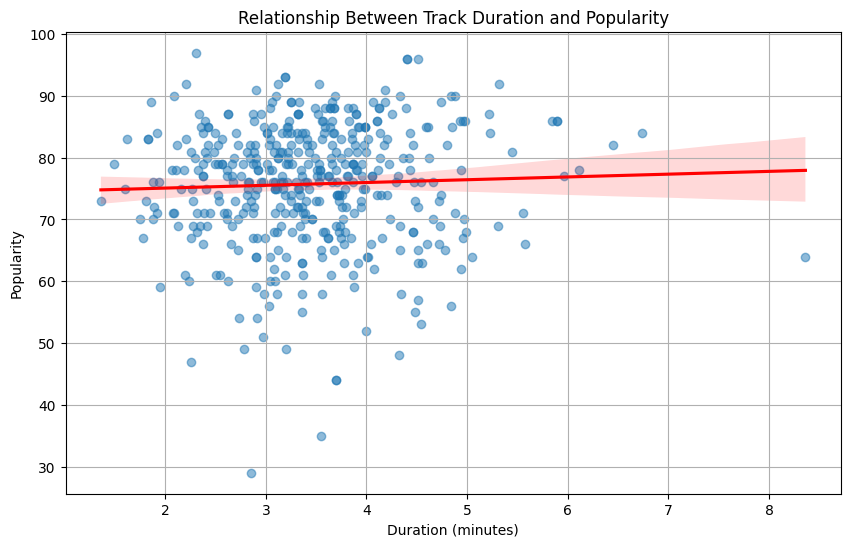

In [7]:
#ans :
#step 1 :

df = pd.read_csv('spotify.csv')
# Converting duration from milliseconds to minutes for better readability
df["Duration (min)"] = df["Duration (ms)"] / 60000


#step 2 :

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Duration (min)", y="Popularity", data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Labels and title
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.title("Relationship Between Track Duration and Popularity")
plt.grid(True)
plt.show()


####Based on the visualization:

- There doesn't appear to be a strong correlation between track duration and popularity.
- Most popular tracks seem to be within a certain duration range (roughly between 2.5 to 4.5 minutes).
- Extremely short or long tracks tend to have lower popularity scores.

##Q4 : Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

Artist with the highest number of tracks:
Drake with 20 tracks


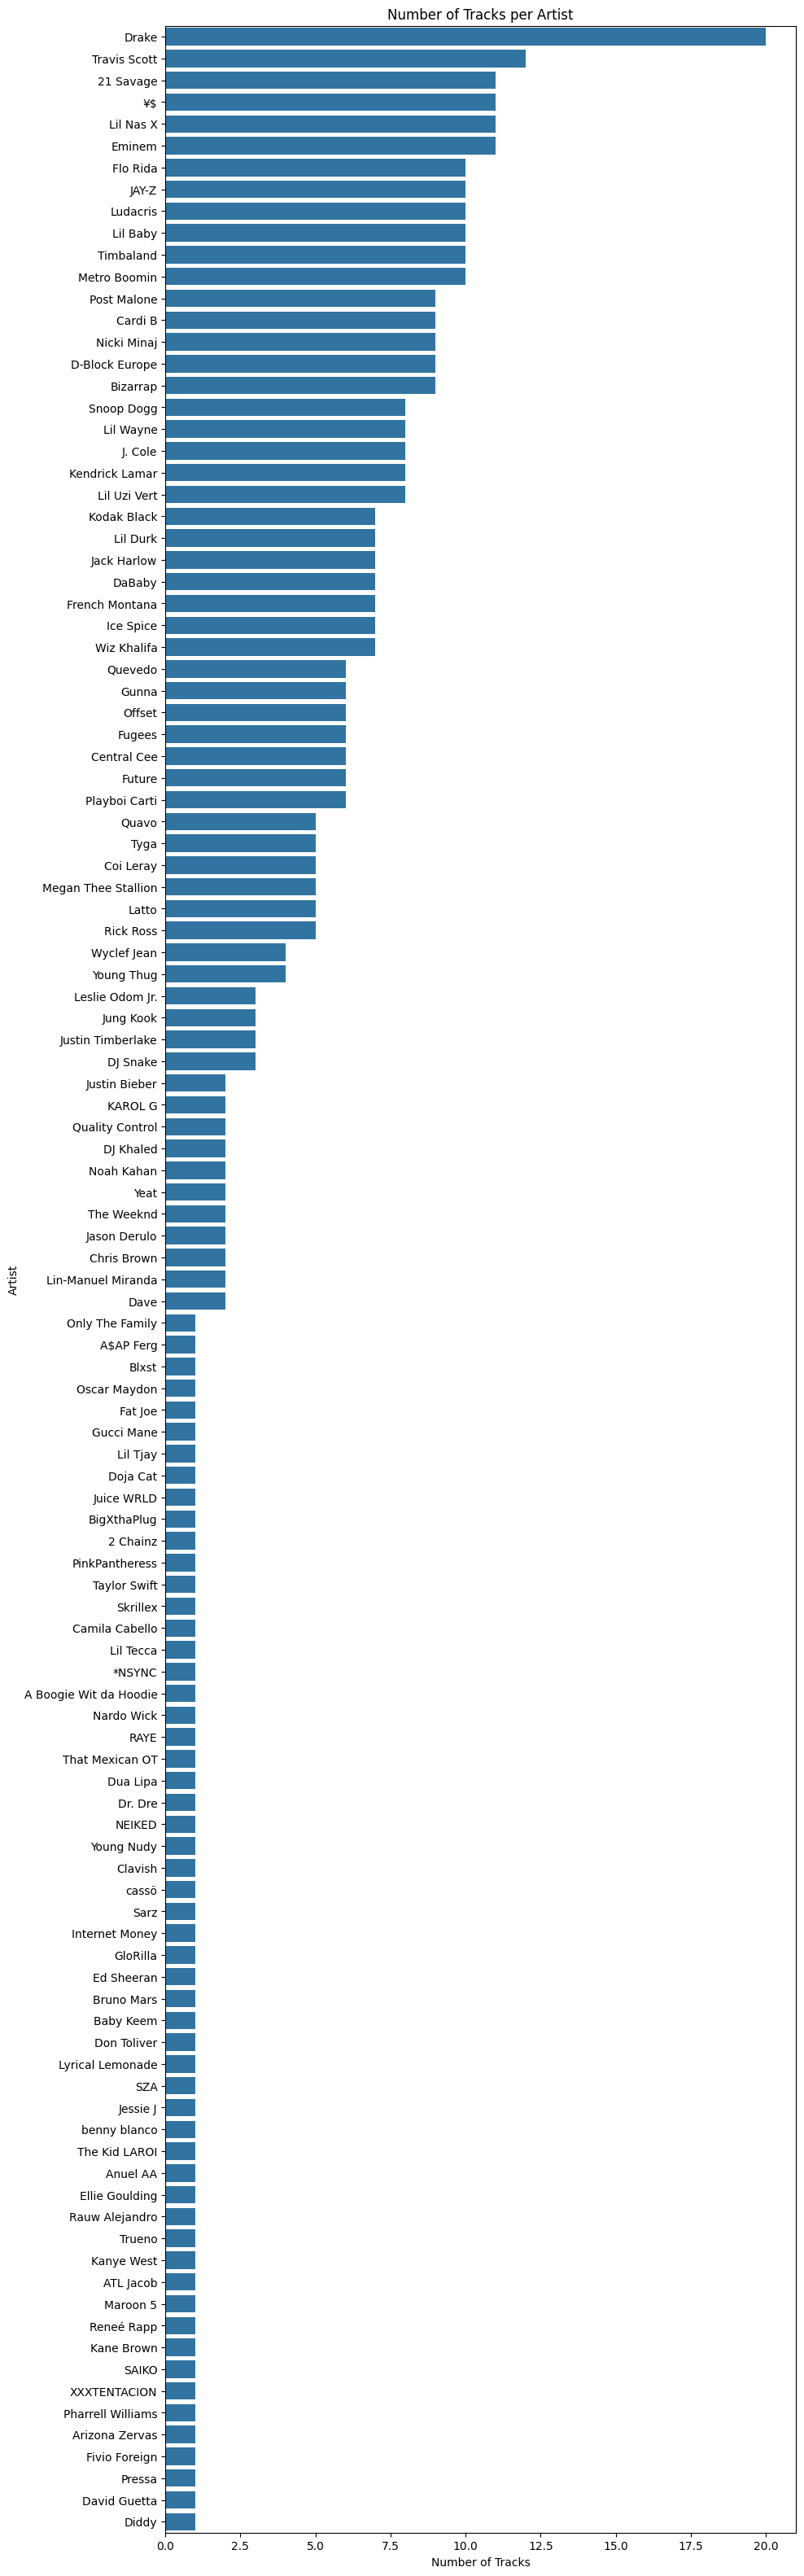

In [13]:
#ans :

#step 1 :

df = pd.read_csv('spotify.csv')
# the number of tracks for each artist
artist_track_counts = df['Artist'].value_counts()
#the artist with the highest number of tracks
print("Artist with the highest number of tracks:")
print(artist_track_counts.idxmax(), "with", artist_track_counts.max(), "tracks")

#step 2 :

#countplot
plt.figure(figsize=(10, 40))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

##Q5 :  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [14]:
#ans :
#step 1 :

df = pd.read_csv('spotify.csv')

# Sorting the dataset by popularity in ascending order
sorted_df = df.sort_values(by='Popularity', ascending=True)

# Extracting the top 5 least popular tracks
least_popular_tracks = sorted_df.head(5)

# Displaying the artist name and track name for the top 5 least popular tracks
print("Top 5 least popular tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Top 5 least popular tracks:
Artist: Pressa, Track: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track: Intentions, Popularity: 35
Artist: French Montana, Track: Splash Brothers, Popularity: 44
Artist: French Montana, Track: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track: On Me - Remix, Popularity: 47


##Q6 : Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [15]:
#ans :

#step 1 :

df = pd.read_csv('spotify.csv')

# group by artist and calculate the average popularity
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sorting the average popularity in descending order
artist_avg_popularity = artist_avg_popularity.sort_values(by='Popularity', ascending=False)

# the top 5 artists by average popularity
top_5_artists = artist_avg_popularity.head(5)

#the top 5 artists and their average popularity
print("Top 5 artists by average popularity:")
print(top_5_artists)

# the artist with the highest average popularity
highest_avg_artist = top_5_artists.iloc[0]
print(f"\nThe artist with the highest average popularity is {highest_avg_artist['Artist']} with an average popularity of {highest_avg_artist['Popularity']:.2f}")

Top 5 artists by average popularity:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909

The artist with the highest average popularity is cassö with an average popularity of 92.00


##Q7 : For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [16]:
#ans :

df = pd.read_csv('spotify.csv')

# Group by artist and calculate the average popularity
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort by average popularity in descending order
artist_avg_popularity = artist_avg_popularity.sort_values(by='Popularity', ascending=False)

# Get the top 5 artists by average popularity
top_5_artists = artist_avg_popularity.head(5)

# Initialize a dictionary to store the most popular track for each artist
most_popular_tracks = {}

# Iterate over the top 5 artists
for artist in top_5_artists['Artist']:
    # Filter the dataset for the current artist
    artist_tracks = df[df['Artist'] == artist]

    # Find the track with the highest popularity for the current artist
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]

    # Store the track name in the dictionary
    most_popular_tracks[artist] = most_popular_track['Track Name']

# the most popular tracks for the top 5 artists
print("Most popular tracks for the top 5 artists:")
for artist, track in most_popular_tracks.items():
    print(f"{artist}: {track}")

Most popular tracks for the top 5 artists:
cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


##Q8 : Visualize relationships between multiple numerical variables simultaneously using a pair plot.

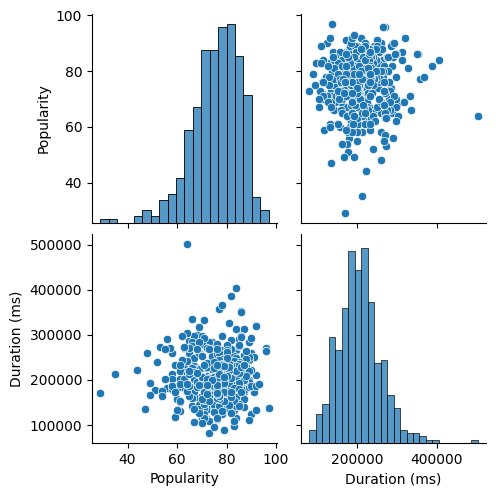

In [20]:
#ans :
df = pd.read_csv('spotify.csv')

sns.pairplot(df[['Popularity', 'Duration (ms)',hue :='Artist']])
plt.show()


##Q9 : Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

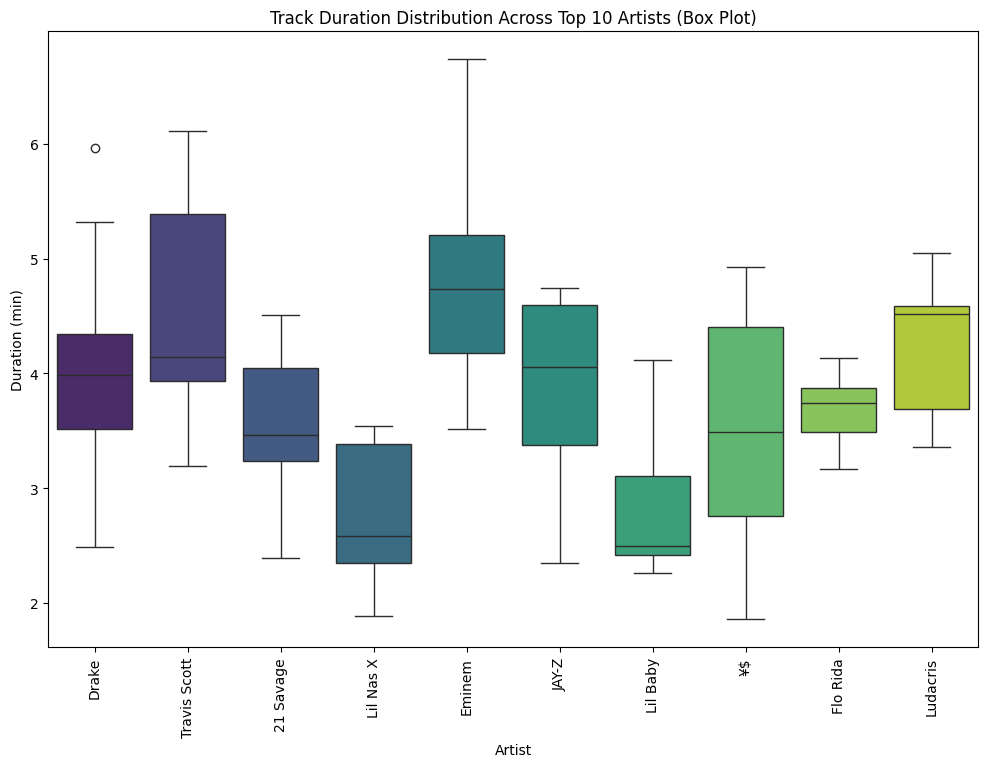

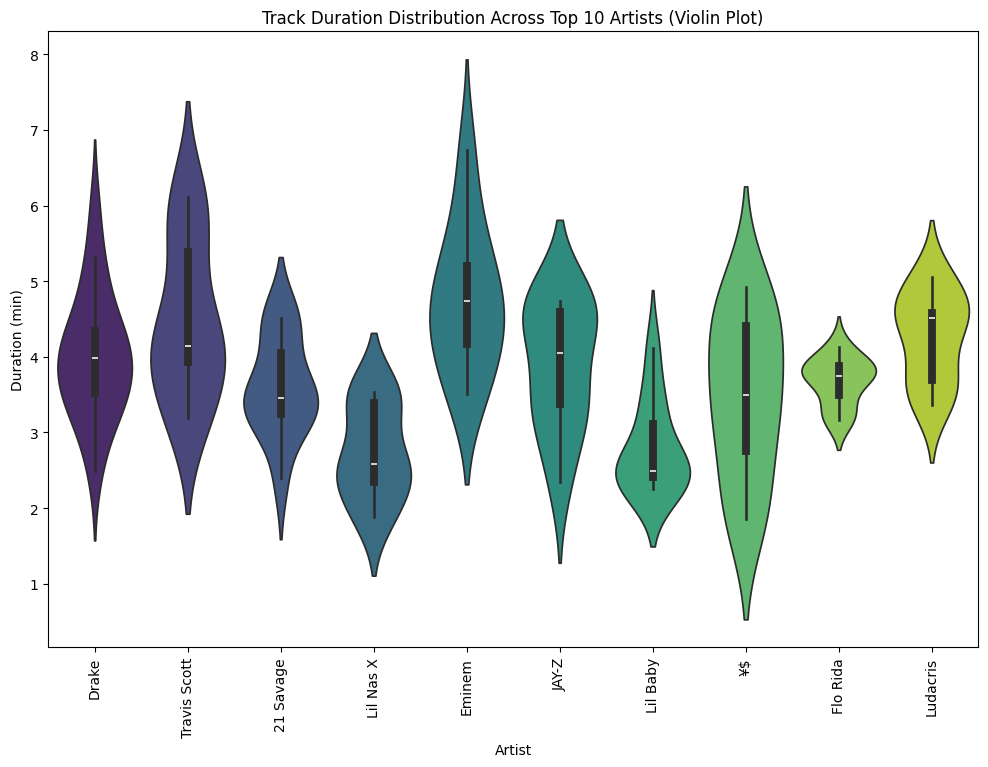

In [22]:
#ans :

#step 1 :

df = pd.read_csv('spotify.csv')

# Converting Duration (ms) to minutes for better readability
df['Duration (min)'] = df['Duration (ms)'] / 60000

# Selecting top 10 artists with the most tracks for visualization
top_artists = df['Artist'].value_counts().head(10).index

# Filtering the dataset for the top 10 artists
top_artists_df = df[df['Artist'].isin(top_artists)]

#step 2 :

# box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (min)', data=top_artists_df, palette='viridis')
plt.title('Track Duration Distribution Across Top 10 Artists (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (min)')
plt.xticks(rotation=90)
plt.show()

# violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Duration (min)', data=top_artists_df, palette='viridis')
plt.title('Track Duration Distribution Across Top 10 Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (min)')
plt.xticks(rotation=90)
plt.show()

##Q10 : How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

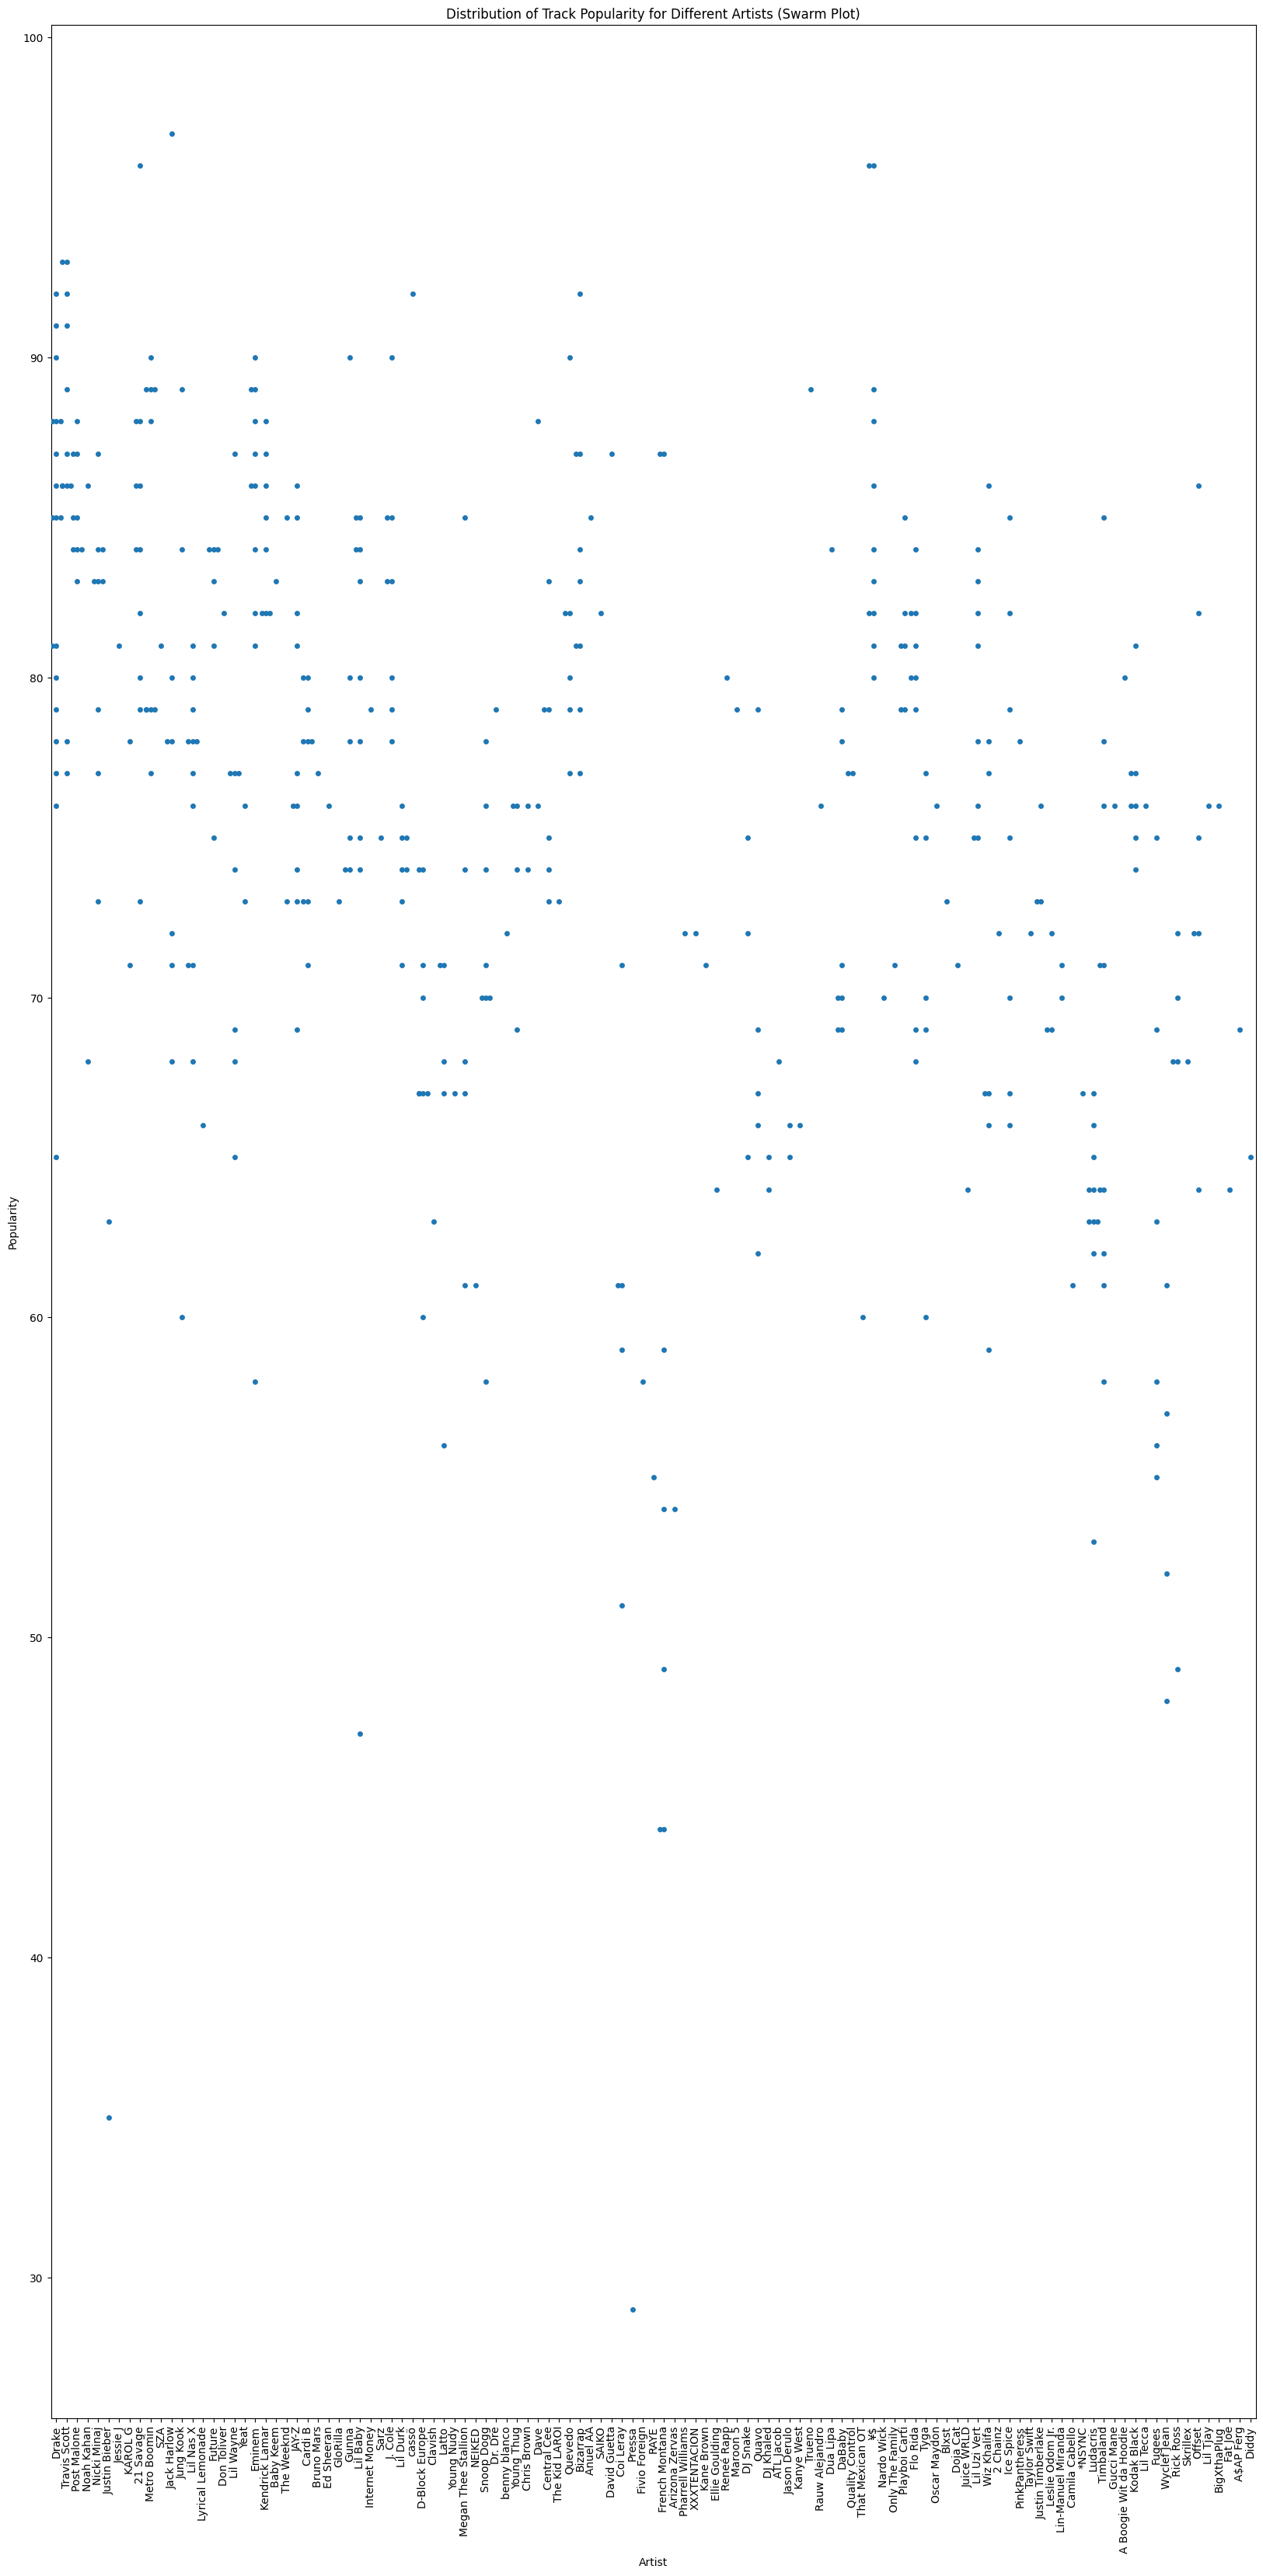

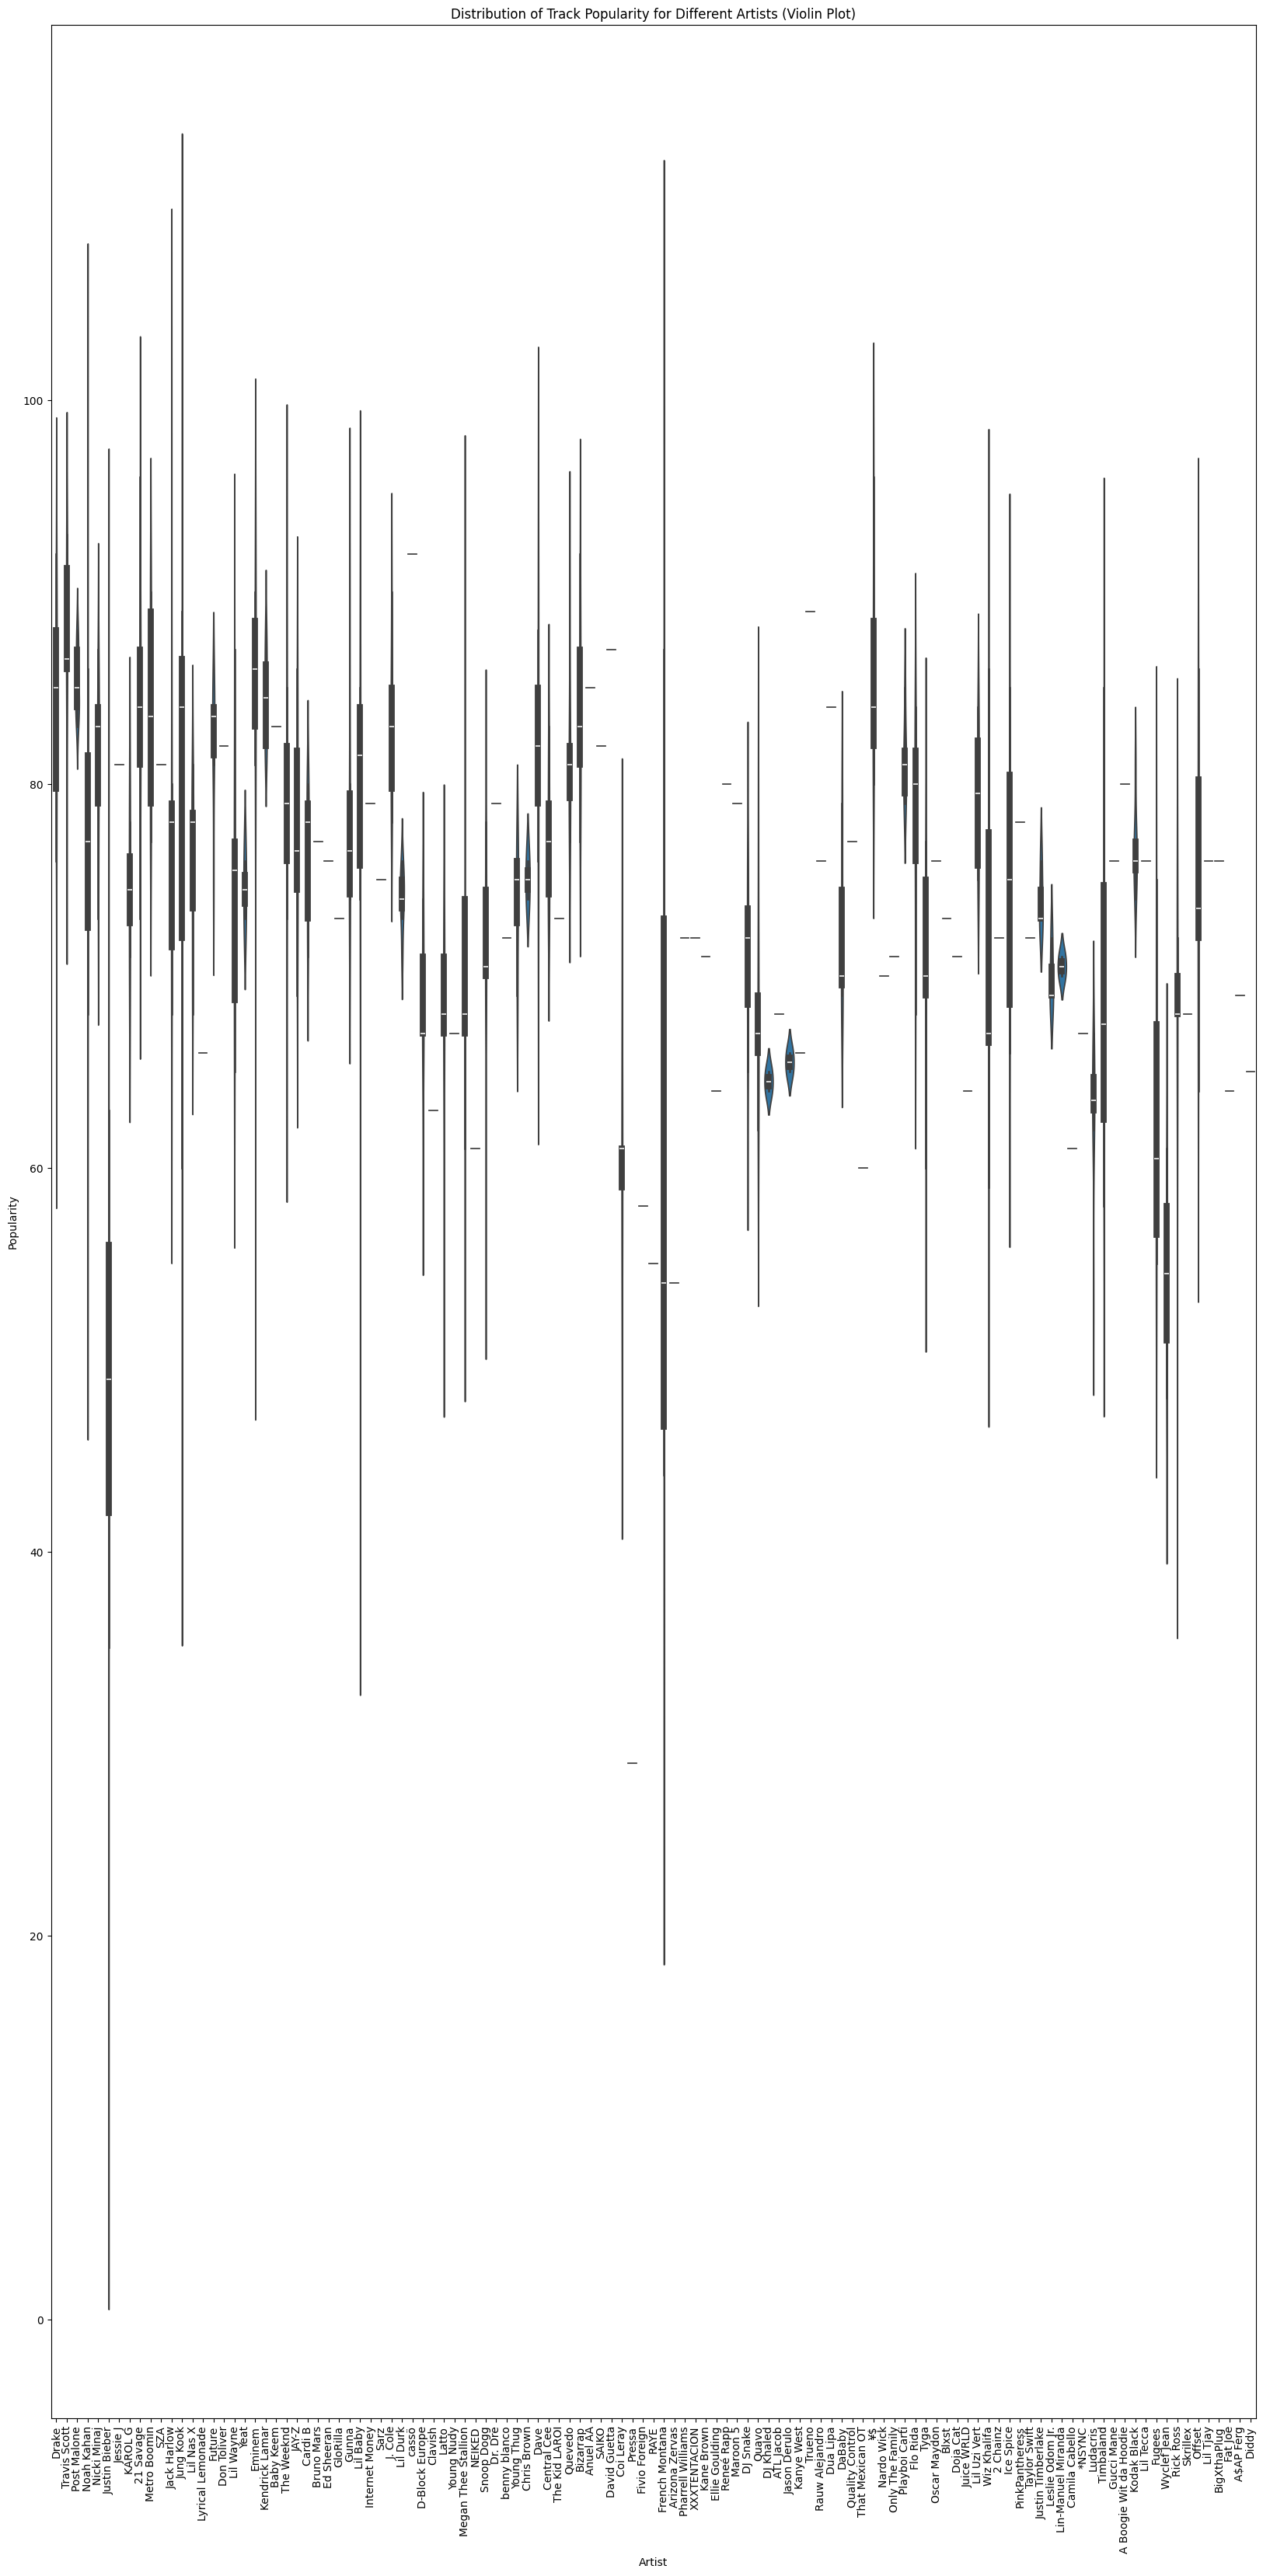

In [27]:
#ans :
df = pd.read_csv('spotify.csv')

plt.figure(figsize=(20,40))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity for Different Artists (Swarm Plot)')
plt.show()

plt.figure(figsize=(20,40))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity for Different Artists (Violin Plot)')
plt.show()